In [1]:
#@title Update Matplotlib & Seaborn
# Setelah update matplotlib, restart runtime sebelum proses import tools lainnya.
!pip install matplotlib --upgrade
%matplotlib inline
!pip install seaborn --upgrade
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Setiap ada error 'str' not callable
from importlib import reload
plt=reload(plt)

NameError: ignored

## Persiapan data & tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import cycle, islice
from statistics import variance
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [5]:
df2 = pd.read_csv('insurance.csv')

In [6]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [7]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
for col in df2.columns:
  print(df2[col].value_counts())
  print('')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

male      676
female    662
Name: sex, dtype: int64

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
 

In [10]:
# Mencocokkan data dari df2.info dengan mencari len kategorik

region_southeast = df2["region"] == "southeast"
peserta_southeast = df2[region_southeast]
jumlah_peserta_southeast = len(peserta_southeast)
print(f"Peserta asuransi yang berada di Southeast sebanyak {jumlah_peserta_southeast} orang.")

region_southwest = df2["region"] == "southwest"
peserta_southwest = df2[region_southwest]
jumlah_peserta_southwest = len(peserta_southwest)
print(f"Peserta asuransi yang berada di Southwest sebanyak {jumlah_peserta_southwest} orang.")

region_northwest = df2["region"] == "northwest"
peserta_northwest = df2[region_northwest]
jumlah_peserta_northwest = len(peserta_northwest)
print(f"Peserta asuransi yang berada di Northwest sebanyak {jumlah_peserta_northwest} orang.")

region_northeast = df2["region"] == "northeast"
peserta_northeast = df2[region_northeast]
jumlah_peserta_northeast = len(peserta_northeast)
print(f"Peserta asuransi yang berada di Northeast sebanyak {jumlah_peserta_northeast} orang.")

print("---")
print("Cocok")

Peserta asuransi yang berada di Southeast sebanyak 364 orang.
Peserta asuransi yang berada di Southwest sebanyak 325 orang.
Peserta asuransi yang berada di Northwest sebanyak 325 orang.
Peserta asuransi yang berada di Northeast sebanyak 324 orang.
---
Cocok


In [11]:
df2.sort_values('region')

,age,sex,bmi,children,smoker,region,charges
668,62,male,32.015,0,yes,northeast,45710.20785
319,32,male,37.335,1,no,northeast,4667.60765
844,53,male,30.495,0,no,northeast,10072.05505
317,54,male,32.775,0,no,northeast,10435.06525
315,52,male,33.250,0,no,northeast,9722.76950
...,...,...,...,...,...,...,...
290,28,female,33.400,0,no,southwest,3172.01800
888,22,male,39.500,0,no,southwest,1682.59700
294,25,male,26.800,3,no,southwest,3906.12700
918,61,female,28.200,0,no,southwest,13041.92100


## **Langkah 1 - Descriptive Statistics Analysist**

### **Data mengenai Umur**

In [12]:
# Rata-rata umur
rata_rata_umur = df2['age'].mean()
print(f"Rata-rata umur seluruh sampel pengguna asuransi yang diteliti yaitu {rata_rata_umur:.2f} tahun")

Rata-rata umur seluruh sampel pengguna asuransi yang diteliti yaitu 39.21 tahun


**Rata-rata umur pengguna asuransi**
$${\bar{\mu}}= \frac{\sum_i x_i}{N}$$

dengan

$$N=1338$$


$${\bar{\mu}} = 39.21$$

In [13]:
# Rata-rata umur perokok pada data
rata_rata_umur_perokok = df2.loc[df2['smoker'] == 'yes', 'age'].mean()
print(f"Rata-rata umur perokok pengguna asuransi adalah {rata_rata_umur_perokok:.2f} tahun")

Rata-rata umur perokok pengguna asuransi adalah 38.51 tahun


In [14]:
# Rata-rata umur perempuan & laki-laki yang merokok
rata_rata_umur_perokok_perempuan = df2.loc[(df2['smoker'] == 'yes') & (df2['sex'] == 'female'), 'age'].mean()
rata_rata_umur_perokok_laki_laki = df2.loc[(df2['smoker'] == 'yes') & (df2['sex'] == 'male'), 'age'].mean()
print(f"Rata-rata umur perempuan yang merokok yaitu {rata_rata_umur_perokok_perempuan:.2f} tahun & laki-laki yang merokok yaitu {rata_rata_umur_perokok_laki_laki:.2f} tahun")

Rata-rata umur perempuan yang merokok yaitu 38.61 tahun & laki-laki yang merokok yaitu 38.45 tahun


### **Data mengenai BMI**

In [15]:
#@title Rata-rata BMI pengguna
rata_rata_bmi = df2['bmi'].mean()
print(f"Rata-rata BMI seluruh sampel pengguna asuransi adalah {rata_rata_bmi:.2f}")

Rata-rata BMI seluruh sampel pengguna asuransi adalah 30.66


In [16]:
#@title Rata-rata BMI pengguna asuransi yang perokok
perokok = df2['smoker'] == 'yes'
perokok_df = df2[perokok]
banyak_perokok = len(perokok_df)

bukan_perokok = df2['smoker'] == 'no'
bukan_perokok_df = df2[bukan_perokok]
banyak_bukan_perokok = len(bukan_perokok_df)

rata_rata_bmi_pada_perokok = df2.loc[df2['smoker'] == 'yes', 'bmi'].mean()
rata_rata_bmi_pada_non_perokok = df2.loc[df2['smoker'] == 'no', 'bmi'].mean()

print(f"Jumlah perokok sebanyak {banyak_perokok} orang & non-perokok sebanyak {banyak_bukan_perokok} orang")
print(f"Rata-rata BMI perokok pengguna asuransi adalah {rata_rata_bmi_pada_perokok:.2f} & non-perokok adalah {rata_rata_bmi_pada_non_perokok:.2f}")

Jumlah perokok sebanyak 274 orang & non-perokok sebanyak 1064 orang
Rata-rata BMI perokok pengguna asuransi adalah 30.71 & non-perokok adalah 30.65


In [17]:
#@title Rata-rata BMI pengguna asuransi non-perokok


**Rata-rata BMI pengguna asuransi yang perokok**
$${\bar{\mu}}= \frac{\sum_p x_p}{n_p}$$

dengan

$$n_p=274$$

$${\bar{x_p}} = 30.71$$

In [18]:
#@title Rata-rata BMI pada laki-laki & perempuan
rata_rata_bmi_pada_laki_laki = df2.loc[df2['sex'] == 'male', 'bmi'].mean()
rata_rata_bmi_pada_perempuan = df2.loc[df2['sex'] == 'female', 'bmi'].mean()
print(f"Rata-rata BMI pada laki-laki sebesar {rata_rata_bmi_pada_laki_laki:.2f} & perempuan sebesar {rata_rata_bmi_pada_perempuan:.2f}")

Rata-rata BMI pada laki-laki sebesar 30.94 & perempuan sebesar 30.38


In [19]:
#@title Rata-rata BMI pada laki-laki & perempuan yang merokok
rata_rata_bmi_laki_laki_merokok = df2.loc[(df2['sex'] == 'male') & (df2['smoker'] == 'yes'), 'bmi'].mean()
rata_rata_bmi_perempuan_merokok = df2.loc[(df2['sex'] == 'female') & (df2['smoker'] == 'yes'), 'bmi'].mean()
print(f"Rata-rata BMI laki-laki yang merokok sebesar {rata_rata_bmi_laki_laki_merokok:.2f} & perempuan yang merokok sebesar {rata_rata_bmi_perempuan_merokok:.2f}")

Rata-rata BMI laki-laki yang merokok sebesar 31.50 & perempuan yang merokok sebesar 29.61


In [20]:
# Rata-rata BMI pada laki-laki & perempuan yang merokok di Southwest region
rata_rata_bmi_laki_laki_southwest_merokok = df2.loc[(df2['sex'] == 'male') & (df2['smoker'] == 'yes') & (df2['region'] == 'southwest') , 'bmi'].mean()
rata_rata_bmi_perempuan_southwest_merokok = df2.loc[(df2['sex'] == 'female') & (df2['smoker'] == 'yes') & (df2['region'] == 'southeast') , 'bmi'].mean()
print(f"Rata-rata BMI di Southwest untuk laki-laki perokok sebesar {rata_rata_bmi_laki_laki_southwest_merokok:.2f} dan untuk perempuan perokok sebesar {rata_rata_bmi_perempuan_southwest_merokok:.2f}")

# Rata-rata BMI pada laki-laki & perempuan yang merokok di Southeast region
rata_rata_bmi_laki_laki_southeast_merokok = df2.loc[(df2['sex'] == 'male') & (df2['smoker'] == 'yes') & (df2['region'] == 'southeast') , 'bmi'].mean()
rata_rata_bmi_perempuan_southeast_merokok = df2.loc[(df2['sex'] == 'female') & (df2['smoker'] == 'yes') & (df2['region'] == 'southeast') , 'bmi'].mean()
print(f"Rata-rata BMI di Southeast untuk laki-laki perokok sebesar {rata_rata_bmi_laki_laki_southeast_merokok:.2f} dan untuk perempuan perokok sebesar {rata_rata_bmi_perempuan_southeast_merokok:.2f}")

# Rata-rata BMI pada laki-laki & perempuan yang merokok di Northwest region
rata_rata_bmi_laki_laki_northwest_merokok = df2.loc[(df2['sex'] == 'male') & (df2['smoker'] == 'yes') & (df2['region'] == 'northwest') , 'bmi'].mean()
rata_rata_bmi_perempuan_northwest_merokok = df2.loc[(df2['sex'] == 'female') & (df2['smoker'] == 'yes') & (df2['region'] == 'northwest') , 'bmi'].mean()
print(f"Rata-rata BMI di Northwest untuk laki-laki perokok sebesar {rata_rata_bmi_laki_laki_northwest_merokok:.2f} dan untuk perempuan perokok sebesar {rata_rata_bmi_perempuan_northwest_merokok:.2f}")

# Rata-rata BMI pada laki-laki & perempuan yang merokok di Northeast region
rata_rata_bmi_laki_laki_northeast_merokok = df2.loc[(df2['sex'] == 'male') & (df2['smoker'] == 'yes') & (df2['region'] == 'northeast') , 'bmi'].mean()
rata_rata_bmi_perempuan_northeast_merokok = df2.loc[(df2['sex'] == 'female') & (df2['smoker'] == 'yes') & (df2['region'] == 'northeast') , 'bmi'].mean()
print(f"Rata-rata BMI di Northeast untuk laki-laki perokok sebesar {rata_rata_bmi_laki_laki_northeast_merokok:.2f} dan untuk perempuan perokok sebesar {rata_rata_bmi_perempuan_northeast_merokok:.2f}")

Rata-rata BMI di Southwest untuk laki-laki perokok sebesar 31.50 dan untuk perempuan perokok sebesar 32.25
Rata-rata BMI di Southeast untuk laki-laki perokok sebesar 33.65 dan untuk perempuan perokok sebesar 32.25
Rata-rata BMI di Northwest untuk laki-laki perokok sebesar 29.98 dan untuk perempuan perokok sebesar 28.30
Rata-rata BMI di Northeast untuk laki-laki perokok sebesar 29.56 dan untuk perempuan perokok sebesar 27.26


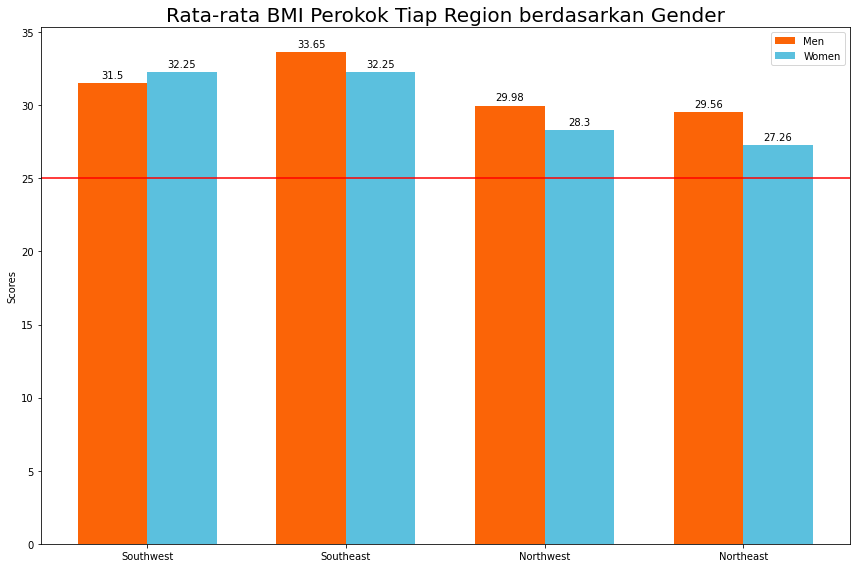

In [21]:
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
men_means = [31.50, 33.65, 29.98, 29.56]
women_means = [32.25, 32.25, 28.30, 27.26]

x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, men_means, width, color='#fb6407', label='Men') 
rects2 = ax.bar(x + width/2, women_means, width, color='#5bc0de', label='Women')
plt.axhline(y=25, color='r', linestyle='-')

# Add some text for regions, title and custom x-axis tick regions, etc.
ax.set_ylabel('Scores')
ax.set_title('Rata-rata BMI Perokok Tiap Region berdasarkan Gender', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### **Data mengenai Variansi**

In [22]:
# Variansi seluruh pengguna asuransi
df2.var()

<ipython-input-22-118f7bc23395>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.var()


age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [23]:
# Variansi charge pengguna yang perokok
variansi_charge_perokok = df2.loc[df2['smoker'] == 'yes', 'charges'].var()
print(f"Variansi charge pada perokok pengguna asuransi sebesar {variansi_charge_perokok:.2F}")

Variansi charge pada perokok pengguna asuransi sebesar 133207311.21


In [24]:
# Variansi charge pengguna yang bukan perokok
variansi_charge_bukan_perokok = df2.loc[df2['smoker'] == 'no', 'charges'].var()
print(f"Variansi charge pada bukan perokok pengguna asuransi sebesar {variansi_charge_bukan_perokok:.2f}")

Variansi charge pada bukan perokok pengguna asuransi sebesar 35925420.50


### **Data mengenai tagihan**

In [25]:
#@title Rata-rata tagihan seluruh sampel pengguna asuransi
tagihan = df2['charges']
rata_rata_tagihan = tagihan.mean()
print(f"Rata-rata tagihan seluruh sampel pengguna asuransi sebesar: {rata_rata_tagihan:.2f}")

Rata-rata tagihan seluruh sampel pengguna asuransi sebesar: 13270.42


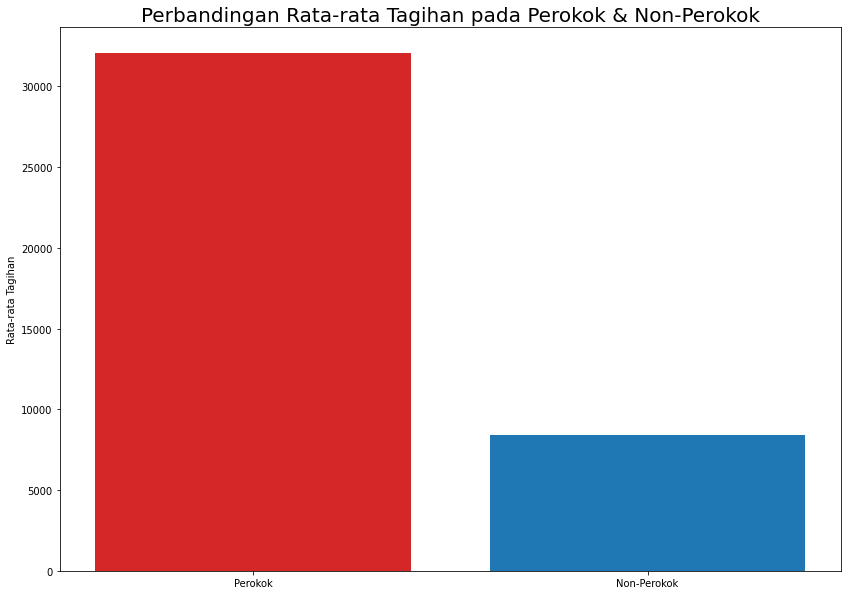

Rata-rata tagihan pada perokok sebesar 32050.23 dan non-perokok sebesar 8434.27


In [26]:
#@title Perbandingan rata-rata tagihan asuransi perokok & non-perokok
# Penghitungan rata-rata tagihan asuransi perokok & non-perokok
rata_rata_tagihan_asuransi_perokok = df2.loc[df2['smoker'] == 'yes','charges'].mean()
rata_rata_tagihan_asuransi_non_perokok = df2.loc[df2['smoker'] == 'no','charges'].mean()

# Perbandingan rata-rata tagihan pada perokok & non-perokok
fig, ax = plt.subplots(figsize=(14, 10))

Smoker = ['Perokok', 'Non-Perokok']
rata_rata_Tagihan = [rata_rata_tagihan_asuransi_perokok, rata_rata_tagihan_asuransi_non_perokok]
bar_labels = ['#d62728', '#1f77b4']
bar_colors = ['#d62728', '#1f77b4']

ax.bar(Smoker, rata_rata_Tagihan, label=bar_labels, color=bar_colors)

ax.set_ylabel('Rata-rata Tagihan')
ax.set_title('Perbandingan Rata-rata Tagihan pada Perokok & Non-Perokok', fontsize=20)

plt.show()

print(f"Rata-rata tagihan pada perokok sebesar {rata_rata_tagihan_asuransi_perokok:.2f} dan non-perokok sebesar {rata_rata_tagihan_asuransi_non_perokok:.2f}")

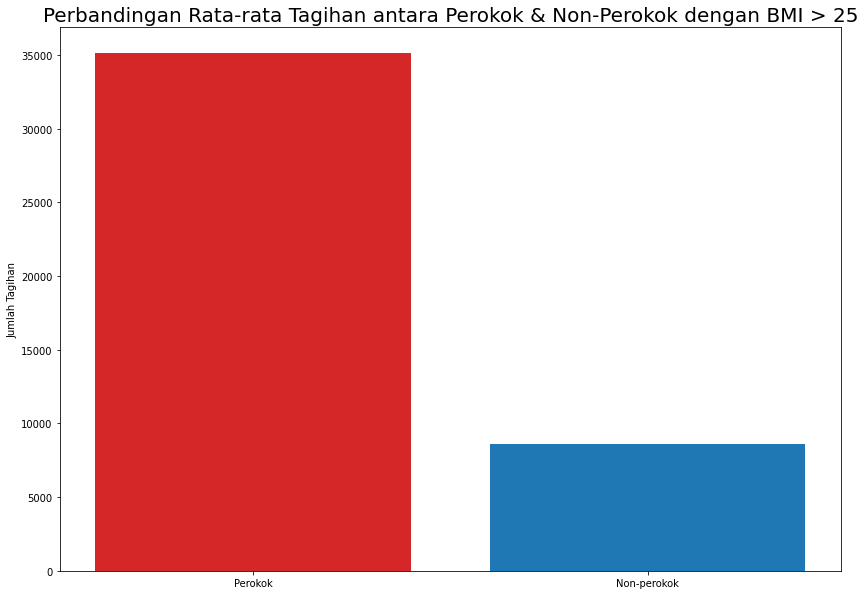

Jumlah orang pada BMI > 25 yang perokok sebanyak 219 orang & non-perokok sebanyak 872 orang
Rata-rata tagihan pada BMI > 25 yang perokok sebesar 35116.91 & non-perokok sebesar 8629.59


In [27]:
#@title Perbandingan tagihan antara perokok & non-perokok dengan BMI > 25

#Jumlah orang perokok & non-perokok dengan BMI > 25
jumlah_perokok_bmi_25 = len(df2.loc[(df2['smoker'] == 'yes') & (df2['bmi'] > 25)])
jumlah_non_perokok_bmi_25 = len(df2.loc[(df2['smoker'] == 'no') & (df2['bmi'] > 25)])

# Penghitungan jumlah tagihan berdasarkan status merokok dengan BMI > 25
tagihan_perokok_bmi_25 = df2.loc[(df2['smoker'] == 'yes') & (df2['bmi'] > 25), 'charges'].mean()
tagihan_non_perokok_bmi_25 = df2.loc[(df2['smoker'] == 'no') & (df2['bmi'] > 25), 'charges'].mean()

# Penentuan ukuran bagan, penulisan label, ukuran data, pewarnaan
fig, ax = plt.subplots(figsize=(14, 10))

Smoker = ['Perokok', 'Non-perokok']
jumlah_Tagihan = [tagihan_perokok_bmi_25, tagihan_non_perokok_bmi_25]
bar_labels = ['#d62728', '#1f77b4']
bar_colors = ['#d62728', '#1f77b4']

ax.bar(Smoker, jumlah_Tagihan, label=bar_labels, color=bar_colors)

ax.set_ylabel('Jumlah Tagihan')
ax.set_title('Perbandingan Rata-rata Tagihan antara Perokok & Non-Perokok dengan BMI > 25', fontsize=20)

plt.show()
print(f"Jumlah orang pada BMI > 25 yang perokok sebanyak {jumlah_perokok_bmi_25} orang & non-perokok sebanyak {jumlah_non_perokok_bmi_25} orang")
print(f"Rata-rata tagihan pada BMI > 25 yang perokok sebesar {tagihan_perokok_bmi_25:.2f} & non-perokok sebesar {tagihan_non_perokok_bmi_25:.2f}")

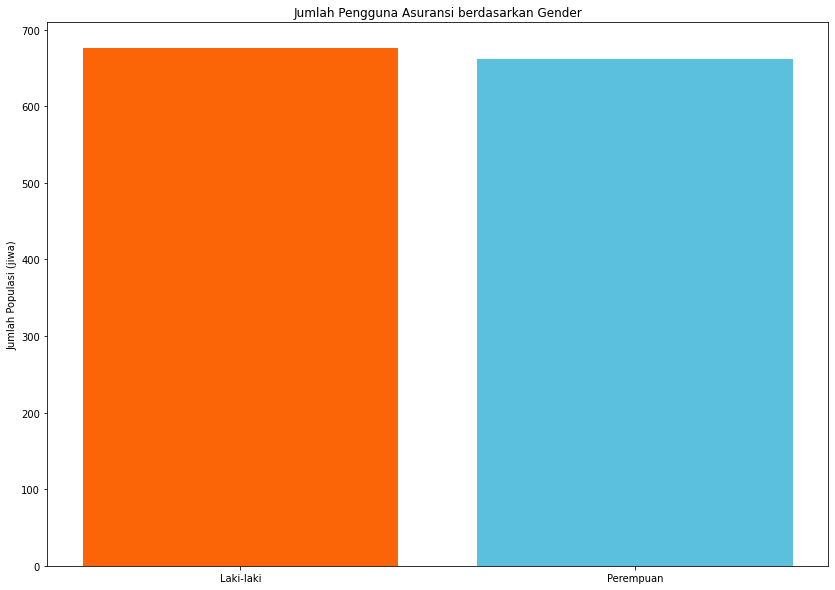

Jumlah pengguna asuransi laki-laki sebanyak 676 orang
Jumlah pengguna asuransi perempuan sebanyak 662 orang


In [28]:
#@title Perbandingan jumlah pengguna asuransi berdasarkan gender

# Penghitungan jumlah pengguna asuransi
laki_laki = df2["sex"] == "male"
peserta_laki_laki = df2[laki_laki]
jumlah_laki_laki = len(peserta_laki_laki)

perempuan = df2["sex"] == "female"
peserta_perempuan = df2[perempuan]
jumlah_perempuan = len(peserta_perempuan)

# Penentuan ukuran bagan, penulisan label, ukuran data, pewarnaan
fig, ax = plt.subplots(figsize=(14, 10))

Gender = ['Laki-laki', 'Perempuan']
Populasi = [jumlah_laki_laki, jumlah_perempuan]
bar_labels = ['#FB6407', '#5BC0DE']
bar_colors = ['#FB6407', '#5BC0DE']

ax.bar(Gender, Populasi, label=bar_labels, color=bar_colors)

ax.set_ylabel('Jumlah Populasi (jiwa)')
ax.set_title('Jumlah Pengguna Asuransi berdasarkan Gender')

plt.show()

print(f"Jumlah pengguna asuransi laki-laki sebanyak {jumlah_laki_laki} orang")
print(f"Jumlah pengguna asuransi perempuan sebanyak {jumlah_perempuan} orang")


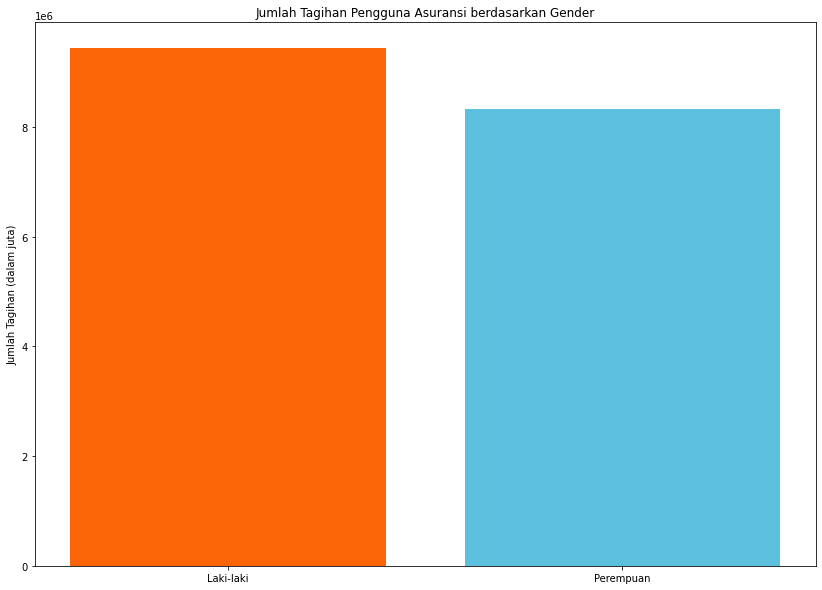

Jumlah tagihan pengguna asuransi laki-laki sebesar 9434763.80
Jumlah tagihan pengguna asuransi perempuan sebesar 8321061.19


In [29]:
#@title Jumlah tagihan pengguna asuransi berdasarkan gender

# Menghitung jumlah tagihan berdasarkan gender
jumlah_tagihan_laki_laki = df2.loc[df2["sex"] == "male", "charges"].sum()
jumlah_tagihan_perempuan = df2.loc[df2["sex"] == "female", "charges"].sum()

fig, ax = plt.subplots(figsize=(14, 10))

Gender = ['Laki-laki', 'Perempuan']
jumlah_Tagihan = [jumlah_tagihan_laki_laki, jumlah_tagihan_perempuan]
bar_labels = ['#FB6407', '#5BC0DE']
bar_colors = ['#FB6407', '#5BC0DE']

ax.bar(Gender, jumlah_Tagihan, label=bar_labels, color=bar_colors)

ax.set_ylabel('Jumlah Tagihan (dalam juta)')
ax.set_title('Jumlah Tagihan Pengguna Asuransi berdasarkan Gender')

plt.show()


print(f"Jumlah tagihan pengguna asuransi laki-laki sebesar {jumlah_tagihan_laki_laki:.2f}")
print(f"Jumlah tagihan pengguna asuransi perempuan sebesar {jumlah_tagihan_perempuan:.2f}")

In [30]:
# Jumlah tagihan pada laki-laki & perempuan di Southwest region
tagihan_laki_laki_southwest = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southwest') , 'charges'].sum()
tagihan_perempuan_southwest = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southeast') , 'charges'].sum()
print(f"Jumlah tagihan di Southwest untuk laki-laki sebesar {tagihan_laki_laki_southwest:.2f} dan untuk perempuan perokok sebesar {tagihan_perempuan_southwest:.2f}")

# Jumlah tagihan pada laki-laki & perempuan di Southeast region
tagihan_laki_laki_southeast = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southeast') , 'charges'].sum()
tagihan_perempuan_southeast = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southeast') , 'charges'].sum()
print(f"Jumlah tagihan di Southeast untuk laki-laki sebesar {tagihan_laki_laki_southeast:.2f} dan untuk perempuan perokok sebesar {tagihan_perempuan_southeast:.2f}")

# Jumlah tagihan pada laki-laki & perempuan di Northwest region
tagihan_laki_laki_northwest = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northwest') , 'charges'].sum()
tagihan_perempuan_northwest = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northwest') , 'charges'].sum()
print(f"Jumlah tagihan di Northwest untuk laki-laki sebesar {tagihan_laki_laki_northwest:.2f} dan untuk perempuan perokok sebesar {tagihan_perempuan_northwest:.2f}")

# Jumlah tagihan pada laki-laki & perempuan di Northeast region
tagihan_laki_laki_northeast = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northeast') , 'charges'].sum()
tagihan_perempuan_northeast = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northeast') , 'charges'].sum()
print(f"Jumlah tagihan di Northeast untuk laki-laki sebesar {tagihan_laki_laki_northeast:.2f} dan untuk perempuan perokok sebesar {tagihan_perempuan_northeast:.2f}")

laki_laki_southwest = len(df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southwest')])
laki_laki_southeast = len(df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southeast')])
laki_laki_northwest = len(df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northwest')])
laki_laki_northeast = len(df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northeast')])

perempuan_southwest = len(df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southwest')])
perempuan_southeast = len(df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southeast')])
perempuan_northwest = len(df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northwest')])
perempuan_northeast = len(df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northeast')])

print(f"laki-laki: southwest = {laki_laki_southwest}, southeast = {laki_laki_southeast}, northwest = {laki_laki_northwest}, northeast = {laki_laki_northeast}")
print(f"perempuan: southwest = {perempuan_southwest}, southeast = {perempuan_southeast}, northwest = {perempuan_northwest}, northeast = {perempuan_northeast}")

Jumlah tagihan di Southwest untuk laki-laki sebesar 2186300.02 dan untuk perempuan perokok sebesar 2362442.12
Jumlah tagihan di Southeast untuk laki-laki sebesar 3001247.65 dan untuk perempuan perokok sebesar 2362442.12
Jumlah tagihan di Northwest untuk laki-laki sebesar 1989013.25 dan untuk perempuan perokok sebesar 2046698.75
Jumlah tagihan di Northeast untuk laki-laki sebesar 2258202.88 dan untuk perempuan perokok sebesar 2085465.71
laki-laki: southwest = 163, southeast = 189, northwest = 161, northeast = 163
perempuan: southwest = 162, southeast = 175, northwest = 164, northeast = 161


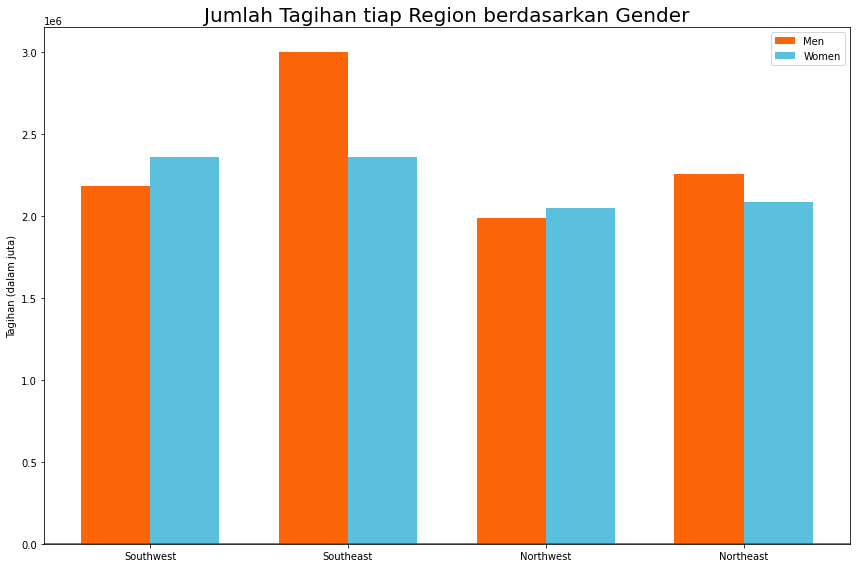

In [31]:
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
men_charges = [2186300.02, 3001247.65, 1989013.25, 2258202.88]
women_charges = [2362442.12, 2362442.12, 2046698.75, 2085465.71]

x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, men_charges, width, color='#fb6407', label='Men') 
rects2 = ax.bar(x + width/2, women_charges, width, color='#5bc0de', label='Women')
plt.axhline(y=25, color='r', linestyle='-')

# Add some text for regions, title and custom x-axis tick regions, etc.
ax.set_ylabel('Tagihan (dalam juta)')
ax.set_title('Jumlah Tagihan tiap Region berdasarkan Gender', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax.legend()

fig.tight_layout()

plt.show()

## **Langkah 2 - Analisa Variabel Kategorik/Probability Mass Function (PMF)**

In [32]:
#@title Persiapan Data Status Merokok & Jenis Kelamin
data = pd.read_csv('insurance.csv')
smoker_sex = pd.DataFrame(data, columns = ['smoker', 'sex'])
print(smoker_sex)

     smoker     sex
0       yes  female
1        no    male
2        no    male
3        no    male
4        no    male
...     ...     ...
1333     no    male
1334     no  female
1335     no  female
1336     no  female
1337    yes  female

[1338 rows x 2 columns]


In [33]:
# Setiap ada error 'str' not callable
from importlib import reload
plt=reload(plt)

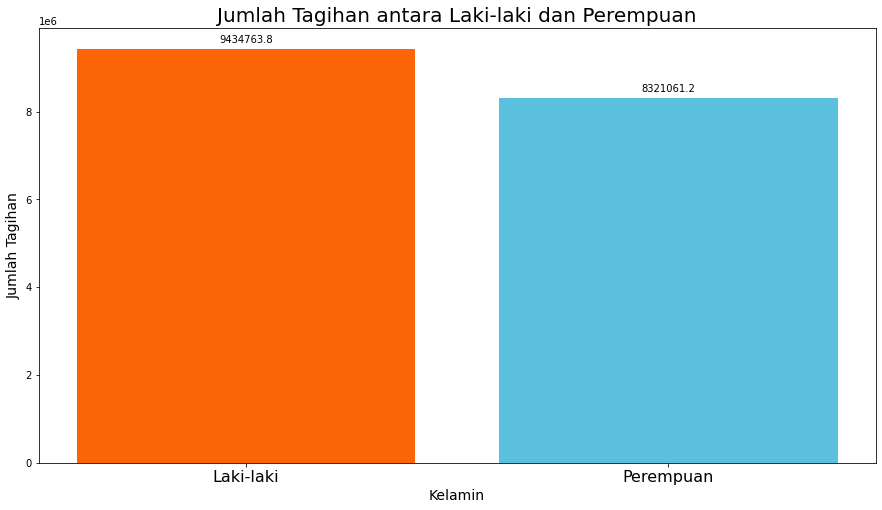

Persentase tagihan laki-laki sebesar 53.14% & tagihan perempuan sebesar 46.86%




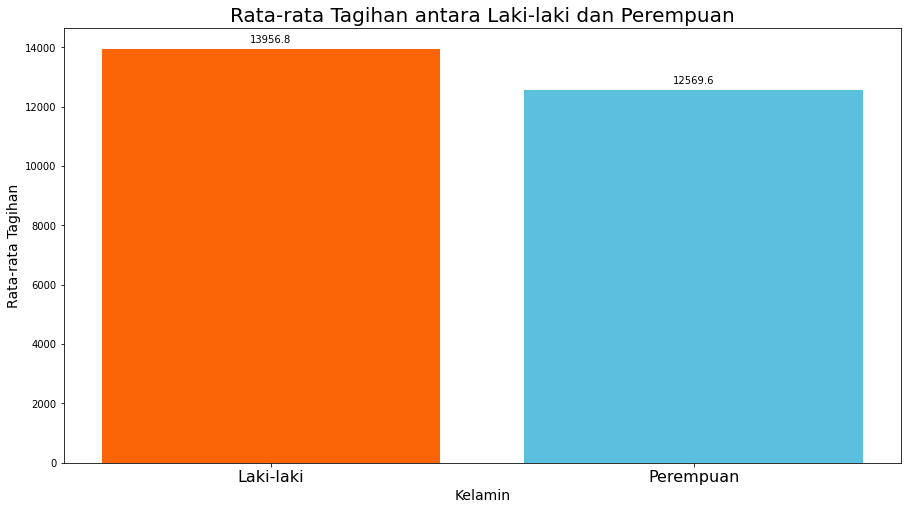

Rata-rata tagihan pada pengguna asuransi laki-laki sebesar Rp. 13956.75
Rata-rata tagihan pada pengguna asuransi perempuan sebesar Rp. 12569.58
Rata-rata tagihan pada pengguna asuransi laki-laki lebih besar dari rata-rata tagihan asuransi perempuan
Tagihan asuransi laki-laki lebih banyak 11.04% dibanding tagihan asuransi perempuan
---


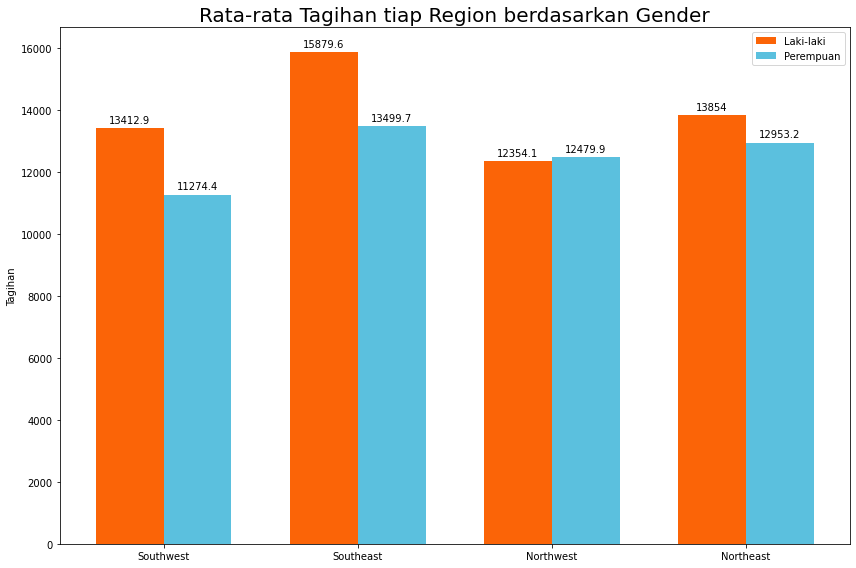

Rata-rata tagihan di Southwest untuk laki-laki sebesar 13412.88 dan untuk perempuan sebesar 11274.41
Rata-rata tagihan di Southeast untuk laki-laki sebesar 15879.62 dan untuk perempuan sebesar 13499.67
Rata-rata tagihan di Northwest untuk laki-laki sebesar 12354.12 dan untuk perempuan sebesar 12479.87
Rata-rata tagihan di Northeast untuk laki-laki sebesar 13854.01 dan untuk perempuan sebesar 12953.20


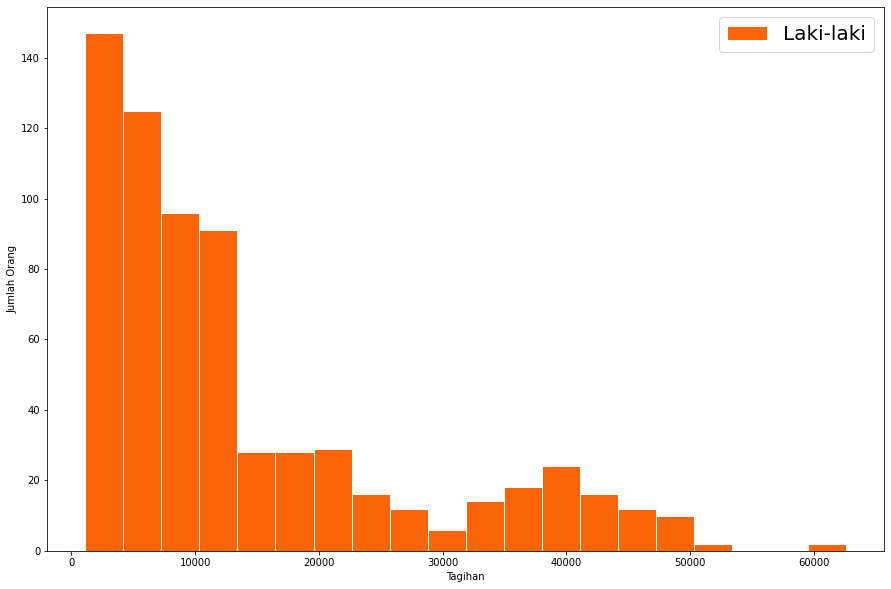

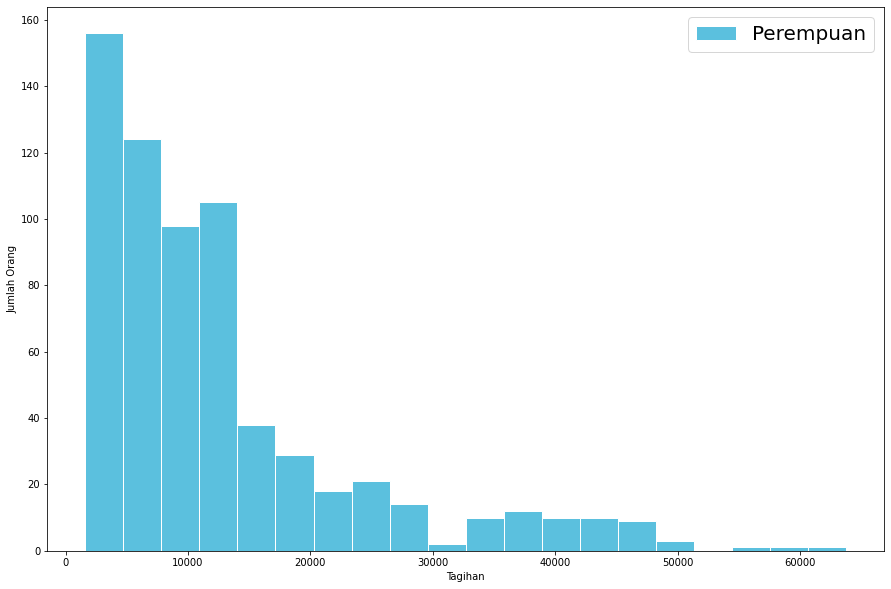

In [34]:
#@title 1. Gender mana yang memiliki tagihan paling tinggi?
jumlah_tagihan_laki_laki = df2.loc[df2['sex'] == 'male', 'charges'].sum()
jumlah_tagihan_perempuan = df2.loc[df2['sex'] == 'female', 'charges'].sum()
persen_tagihan_laki_laki = jumlah_tagihan_laki_laki / (jumlah_tagihan_laki_laki + jumlah_tagihan_perempuan) * 100
persen_tagihan_perempuan = jumlah_tagihan_perempuan / (jumlah_tagihan_laki_laki + jumlah_tagihan_perempuan) * 100

rata_rata_tagihan_laki_laki = df2.loc[df2['sex'] == 'male', 'charges'].mean()
rata_rata_tagihan_perempuan = df2.loc[df2['sex'] == 'female', 'charges'].mean()

#Bar chart total tagihan antar gender pakai seaborn
#tabulasi jumlah tagihan gender
kelamin = ["Laki-laki", "Perempuan"]
jumlah_tagihan = [jumlah_tagihan_laki_laki, jumlah_tagihan_perempuan]
df_jumlah = pd.DataFrame({"Kelamin": kelamin, "Jumlah tagihan": jumlah_tagihan})

x = ('Laki-laki', 'perempuan')
y = [jumlah_tagihan_laki_laki, jumlah_tagihan_perempuan]
x_pos = np.arange(len(x))
plt.figure(figsize=(15, 8))
splot=sns.barplot(x="Kelamin",y="Jumlah tagihan",data=df_jumlah)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Set the font size of xticks, title, label)
plt.xticks(fontsize=16)
plt.xlabel("Kelamin", size=14)
plt.ylabel("Jumlah Tagihan", size=14)
plt.bar(x_pos, y, color = ['#fb6407', '#5bc0de'])
plt.title("Jumlah Tagihan antara Laki-laki dan Perempuan", fontsize=20)

plt.show()
print(f"Persentase tagihan laki-laki sebesar {persen_tagihan_laki_laki:.2f}% & tagihan perempuan sebesar {persen_tagihan_perempuan:.2f}%")
print("\n")
#Bar chart rata-rata tagihan antar gender pakai seaborn
#tabulasi rata-rata tagihan gender
kelamin = ["Laki-laki", "Perempuan"]
rata_rata_tagihan = [rata_rata_tagihan_laki_laki, rata_rata_tagihan_perempuan]
df_rata_rata = pd.DataFrame({"Kelamin": kelamin, "Rata-rata tagihan": rata_rata_tagihan})

x = ('Laki-laki', 'perempuan')
y = [rata_rata_tagihan_laki_laki, rata_rata_tagihan_perempuan]
x_pos = np.arange(len(x))
plt.figure(figsize=(15, 8))
splot=sns.barplot(x="Kelamin",y="Rata-rata tagihan",data=df_rata_rata)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# Set the font size of xticks, title, label)
plt.xticks(fontsize=16)
plt.xlabel("Kelamin", size=14)
plt.ylabel("Rata-rata Tagihan", size=14)
plt.bar(x_pos, y, color = ['#fb6407', '#5bc0de'])
plt.title("Rata-rata Tagihan antara Laki-laki dan Perempuan", fontsize=20)

plt.show()

print(f"Rata-rata tagihan pada pengguna asuransi laki-laki sebesar Rp. {rata_rata_tagihan_laki_laki:.2f}")
print(f"Rata-rata tagihan pada pengguna asuransi perempuan sebesar Rp. {rata_rata_tagihan_perempuan:.2f}")
if rata_rata_tagihan_laki_laki > rata_rata_tagihan_perempuan:
  print("Rata-rata tagihan pada pengguna asuransi laki-laki lebih besar dari rata-rata tagihan asuransi perempuan")
if rata_rata_tagihan_laki_laki < rata_rata_tagihan_perempuan:
  print("Rata-rata tagihan pada pengguna asuransi laki-laki lebih kecil dari rata-rata tagihan asuransi perempuan")

# Persentase selisih rata-rata tagihan laki-laki dan perempuan
persentase_selisih_tagihan = (rata_rata_tagihan_laki_laki - rata_rata_tagihan_perempuan) / rata_rata_tagihan_perempuan *100
print(f"Tagihan asuransi laki-laki lebih banyak {persentase_selisih_tagihan:.2f}% dibanding tagihan asuransi perempuan")

#Rata-rata Tagihan tiap Region berdasarkan Gender
print('---')

# Rata-rata tagihan pada laki-laki & perempuan di Southwest region
rata_rata_tagihan_laki_laki_southwest = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southwest') , 'charges'].mean()
rata_rata_tagihan_perempuan_southwest = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southwest') , 'charges'].mean()

# Rata-rata tagihan pada laki-laki & perempuan di Southeast region
rata_rata_tagihan_laki_laki_southeast = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southeast') , 'charges'].mean()
rata_rata_tagihan_perempuan_southeast = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'southeast') , 'charges'].mean()

# Rata-rata tagihan pada laki-laki & perempuan di Northwest region
rata_rata_tagihan_laki_laki_northwest = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northwest') , 'charges'].mean()
rata_rata_tagihan_perempuan_northwest = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northwest') , 'charges'].mean()

# Rata-rata tagihan pada laki-laki & perempuan di Northeast region
rata_rata_tagihan_laki_laki_northeast = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'northeast') , 'charges'].mean()
rata_rata_tagihan_perempuan_northeast = df2.loc[(df2['sex'] == 'female') & (df2['region'] == 'northeast') , 'charges'].mean()

# Kategorisasi kelompok region & nilai rata-rata berdasarkan gender di tiap region
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
men_means = [13412.88, 15879.62, 12354.12, 13854.01]
women_means = [11274.41, 13499.67, 12479.87, 12953.20]

x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - width/2, men_means, width, label='Laki-laki', color='#fb6407')
rects2 = ax.bar(x + width/2, women_means, width, label='Perempuan', color='#5bc0de')

# Add some text for regions, title and custom x-axis tick regions, etc.
ax.set_ylabel('Tagihan')
ax.set_title('Rata-rata Tagihan tiap Region berdasarkan Gender', fontsize=20)
ax.set_xticks(x, regions)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

print(f"Rata-rata tagihan di Southwest untuk laki-laki sebesar {rata_rata_tagihan_laki_laki_southwest:.2f} dan untuk perempuan sebesar {rata_rata_tagihan_perempuan_southwest:.2f}")
print(f"Rata-rata tagihan di Southeast untuk laki-laki sebesar {rata_rata_tagihan_laki_laki_southeast:.2f} dan untuk perempuan sebesar {rata_rata_tagihan_perempuan_southeast:.2f}")
print(f"Rata-rata tagihan di Northwest untuk laki-laki sebesar {rata_rata_tagihan_laki_laki_northwest:.2f} dan untuk perempuan sebesar {rata_rata_tagihan_perempuan_northwest:.2f}")
print(f"Rata-rata tagihan di Northeast untuk laki-laki sebesar {rata_rata_tagihan_laki_laki_northeast:.2f} dan untuk perempuan sebesar {rata_rata_tagihan_perempuan_northeast:.2f}")

# Distribusi Tagihan berdasarkan Gender

# Pengelompokan data tagihan berdasarkan gender
sex_male = df2["sex"] == "male"
male_df = df2[sex_male]
sex_female = df2["sex"] == "female"
female_df = df2[sex_female]

from importlib import reload
plt=reload(plt)
# Distribusi tagihan laki-laki
plt.figure(figsize=(15,10))
plt.hist(male_df['charges'], edgecolor='white', color='#fb6407', bins=20)
plt.xlabel("Tagihan")
plt.ylabel("Jumlah Orang")
plt.title = ('Distribusi Tagihan Laki-laki') 
plt.legend(["Laki-laki"], prop={'size': 20}, loc ="upper right")

# Distribusi tagihan perempuan
plt.figure(figsize=(15,10))
plt.hist(female_df['charges'], edgecolor='white', color='#5bc0de', bins=20)
plt.xlabel("Tagihan")
plt.ylabel("Jumlah Orang")
plt.title = ('Distribusi Tagihan Perempuan')
plt.legend(["Perempuan"], prop={'size': 20}, loc ="upper right") 

In [35]:
jumlah_tagihan_laki_laki_southwest = df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southwest') , 'charges'].sum()
jumlah_laki_laki_southwest = len(df2.loc[(df2['sex'] == 'male') & (df2['region'] == 'southwest')])

In [36]:
jumlah_tagihan_laki_laki_southwest/jumlah_laki_laki_southwest

13412.883576134967

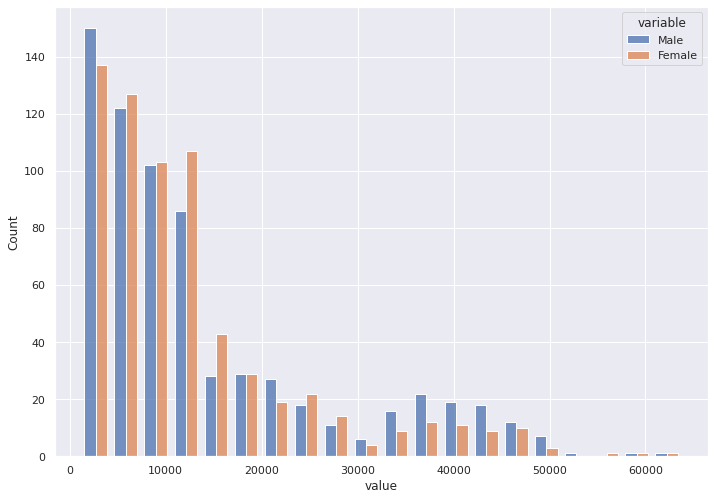

In [37]:
# Pengelompokan data tagihan berdasarkan gender
sex_male = df2["sex"] == "male"
male_df = df2[sex_male]
sex_female = df2["sex"] == "female"
female_df = df2[sex_female]

# Pengerucutan data tagihan berdasarkan gender
male_charges = male_df[['sex', 'charges']]
female_charges = female_df[['sex', 'charges']]

# Merapikan data (urutan nilai tagihan, lalu urutan index) tagihan gender
male_charges_df = male_charges.sort_values(by='charges')
male_charges_df.reset_index(inplace = True)
del male_charges_df['index']
female_charges_df = female_charges.sort_values(by='charges')
female_charges_df.reset_index(inplace = True)
del female_charges_df['index']

# Menyederhanakan DataFrame tagihan tiap gender menjadi 1 kolom
male_charges_df2 = male_charges_df.rename(columns={'charges' : 'Male'})
male_charges_df3 = male_charges_df2[['Male']]
female_charges_df2 = female_charges_df.rename(columns={'charges' : 'Female'})
female_charges_df3 = female_charges_df2[['Female']]

# Menggabungkan 2 DataFrame tagihan tiap gender
tagihan_gender_df = pd.concat([male_charges_df3, female_charges_df3], axis=1)

# Melted DataFrame tagihan tiap region dituangkan dalam histogram distribusi
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(tagihan_gender_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20);

In [38]:
#@title 2. Distribusi peluang tagihan di tiap-tiap region

# Pengelompokan tabel region
region_southwest = df2["region"] == "southwest"
from_southwest = df2[region_southwest]
region_southeast = df2["region"] == "southeast"
from_southeast = df2[region_southeast]
region_northwest = df2["region"] == "northwest"
from_northwest = df2[region_northwest]
region_northeast = df2["region"] == "northeast"
from_northeast = df2[region_northeast]

southwest_charges = from_southwest[['region', 'charges']]
southeast_charges = from_southeast[['region', 'charges']]
northwest_charges = from_northwest[['region', 'charges']]
northeast_charges = from_northeast[['region', 'charges']]

# Pengerucutan data tagihan berdasarkan region
southwest_charges_only = southwest_charges[['charges']]
tagihan_SW = southwest_charges_only.rename(columns={'charges' : 'Southwest'})

southeast_charges_only = southeast_charges[['charges']]
tagihan_SE = southeast_charges_only.rename(columns={'charges' : 'Southeast'})

northwest_charges_only = northwest_charges[['charges']]
tagihan_NW = northwest_charges_only.rename(columns={'charges' : 'Northwest'})

northeast_charges_only = northeast_charges[['charges']]
tagihan_NE = northeast_charges_only.rename(columns={'charges' : 'Northeast'})

# Mengurutkan besaran tagihan & merapikan index yang tidak urut sisa dari DataFrame sebelum pengelompokan
tagihan_SW_df = tagihan_SW.sort_values(by=['Southwest'])
tagihan_SW_df.reset_index(inplace = True)
del tagihan_SW_df['index']

tagihan_SE_df = tagihan_SE.sort_values(by=['Southeast'])
tagihan_SE_df.reset_index(inplace = True)
del tagihan_SE_df['index']

tagihan_NW_df = tagihan_NW.sort_values(by=['Northwest'])
tagihan_NW_df.reset_index(inplace = True)
del tagihan_NW_df['index']

tagihan_NE_df = tagihan_NE.sort_values(by=['Northeast'])
tagihan_NE_df.reset_index(inplace = True)
del tagihan_NE_df['index']

# Menggabungkan Data Frame Tagihan tiap Region yang sudah dirapikan indexnya
tagihan_region_df = pd.concat([tagihan_SW_df, tagihan_SE_df, tagihan_NW_df, tagihan_NE_df], axis=1)

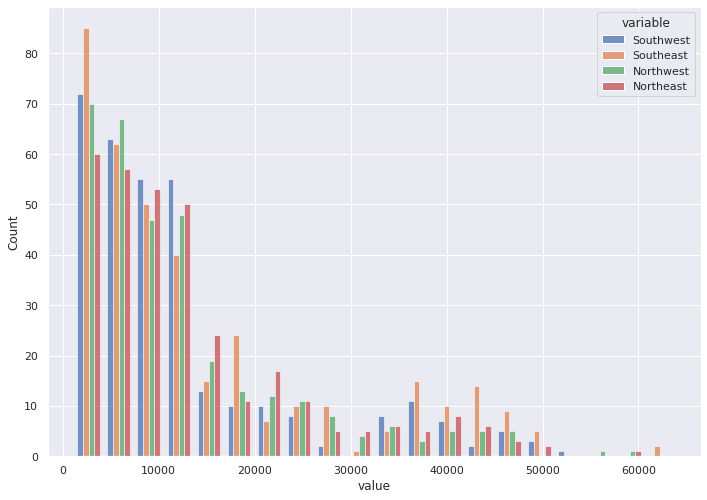

In [39]:
# Melted DataFrame tagihan tiap region dituangkan dalam histogram distribusi
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(tagihan_region_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20);

Urut dari atas ke bawah: southwest, southeast, northwest & northeast


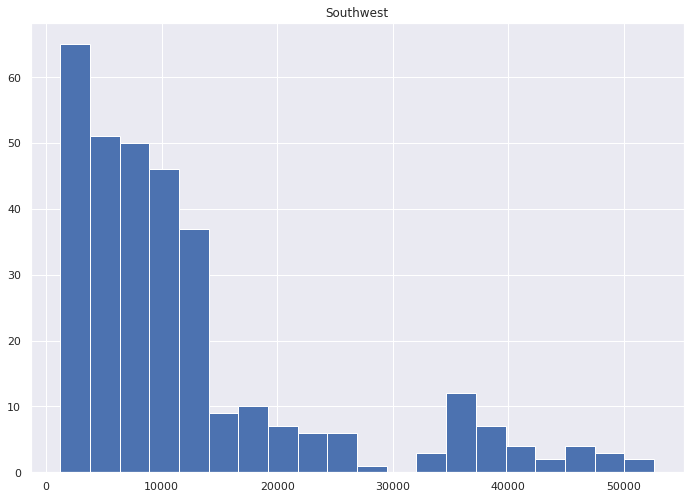

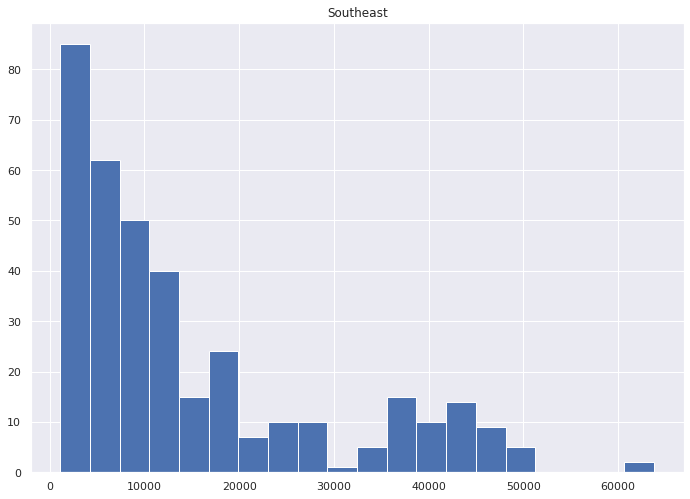

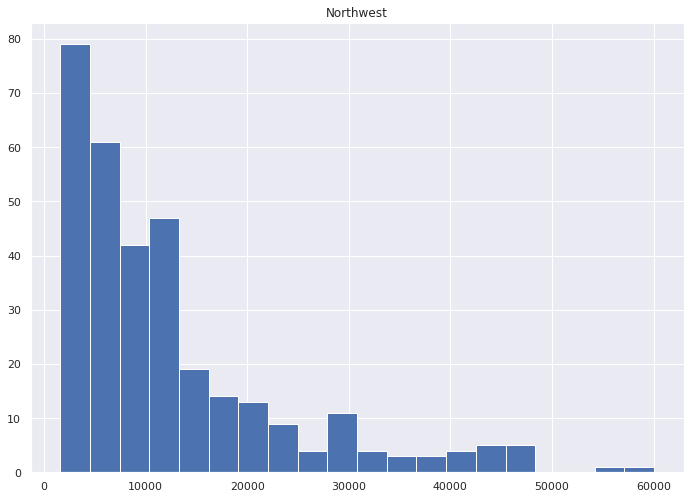

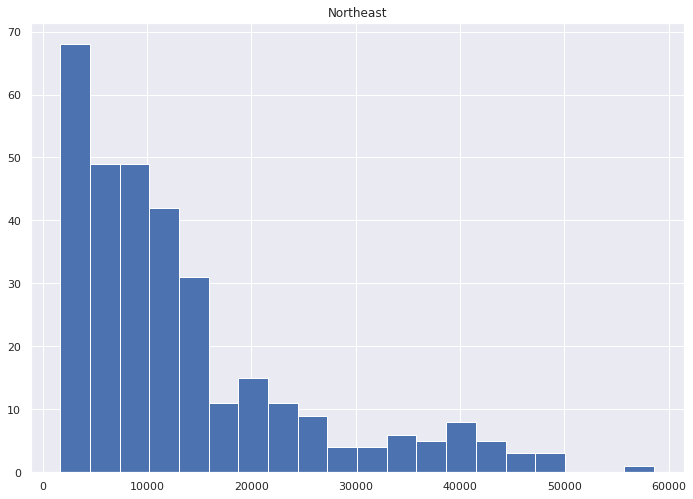

In [40]:
print('Urut dari atas ke bawah: southwest, southeast, northwest & northeast')
tagihan_SW.hist(bins=20);
tagihan_SE.hist(bins=20);
tagihan_NW.hist(bins=20);
tagihan_NE.hist(bins=20);

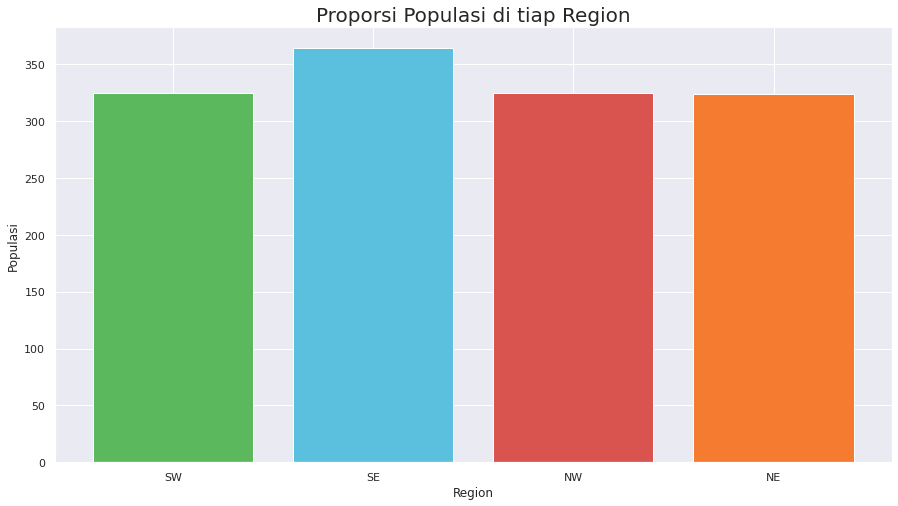

Banyaknya anggota asuransi dari southwest = 325 (24.29%), southeast = 364 (27.20%), northwest = 325 (24.29%), northeast = 324 (24.22%)


In [41]:
from importlib import reload
plt=reload(plt)

#@title 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
n_anggota = len(df2)
n_SW = len(from_southwest)
n_SE = len(from_southeast)
n_NW = len(from_northwest)
n_NE = len(from_northeast)


# Bar chart populasi anggota asuransi tiap region
import matplotlib.pyplot as plt
x = ('SW', 'SE', 'NW', 'NE')
y = [n_SW, n_SE, n_NW, n_NE]
x_pos = np.arange(len(x))

proporsi_SW = n_SW/n_anggota*100
proporsi_SE = n_SE/n_anggota*100
proporsi_NW = n_NW/n_anggota*100
proporsi_NE = n_NE/n_anggota*100

#Set ukuran figura, deskripsi & plot datanya:
plt.figure(figsize=(15,8))
plt.title('Proporsi Populasi di tiap Region', fontsize=20)
plt.ylabel('Populasi')
plt.xlabel('Region')
plt.bar(x_pos, y, color = ['#5cb85c', '#5bc0de', '#d9534f', '#f57b30'])
plt.xticks(x_pos, x)

plt.show()
print(f"Banyaknya anggota asuransi dari southwest = {len(from_southwest)} ({proporsi_SW:.2f}%), southeast = {len(from_southeast)} ({proporsi_SE:.2f}%), northwest = {len(from_northwest)} ({proporsi_NW:.2f}%), northeast = {len(from_northeast)} ({proporsi_NE:.2f}%)")

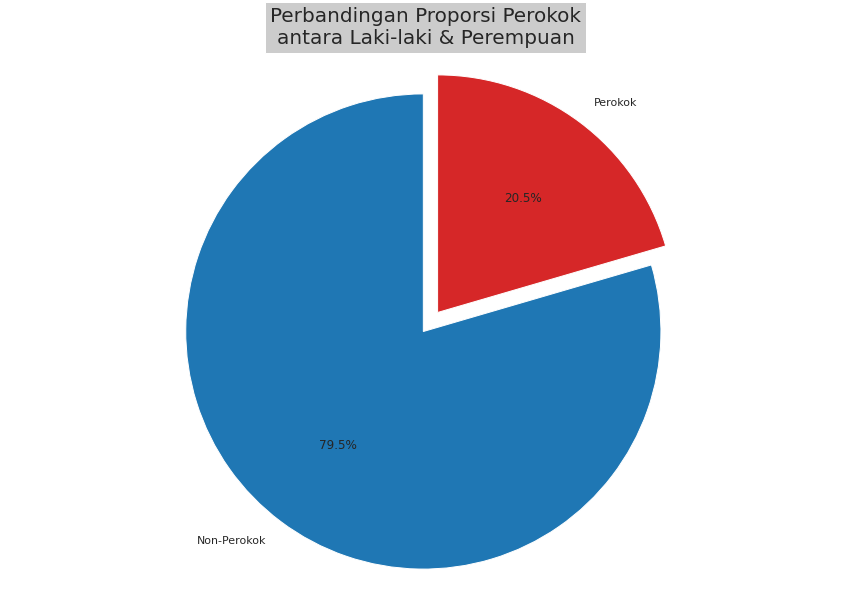

 Persentase pengguna asuransi yang merupakan perokok adalah sebesar 274 (20.48%) dan non-perokok sebesar 1064 (79.52%)
Banyak perokok lebih rendah dari banyaknya non-perokok


In [42]:
#@title 4. Mana yang lebih tinggi: proporsi perokok atau non perokok?
perokok = smoker_sex['smoker'] == 'yes'
pengguna_perokok = smoker_sex[perokok]
jumlah_perokok = len(pengguna_perokok)
p_perokok = jumlah_perokok/n_anggota*100

non_perokok = smoker_sex['smoker'] == 'no'
pengguna_non_perokok = smoker_sex[non_perokok]
jumlah_non_perokok = len(pengguna_non_perokok)
p_non_perokok = jumlah_non_perokok/n_anggota*100

# Perbandingan jumlah perokok & non-perokok pada data pengguna asuransi (pie-chart)

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = 'Non-Perokok', 'Perokok'
sizes = [jumlah_non_perokok, jumlah_perokok]
explode = (0, 0.1) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#1f77b4', '#d62728']

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Perbandingan Proporsi Perokok\n" + "antara Laki-laki & Perempuan", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()

print(f" Persentase pengguna asuransi yang merupakan perokok adalah sebesar {jumlah_perokok} ({p_perokok:.2f}%) dan non-perokok sebesar {jumlah_non_perokok} ({p_non_perokok:.2f}%)")
if banyak_perokok > banyak_bukan_perokok:
  print("Banyak perokok lebih tinggi dari banyak non-perokok")
elif banyak_perokok < banyak_bukan_perokok:
  print("Banyak perokok lebih rendah dari banyaknya non-perokok")

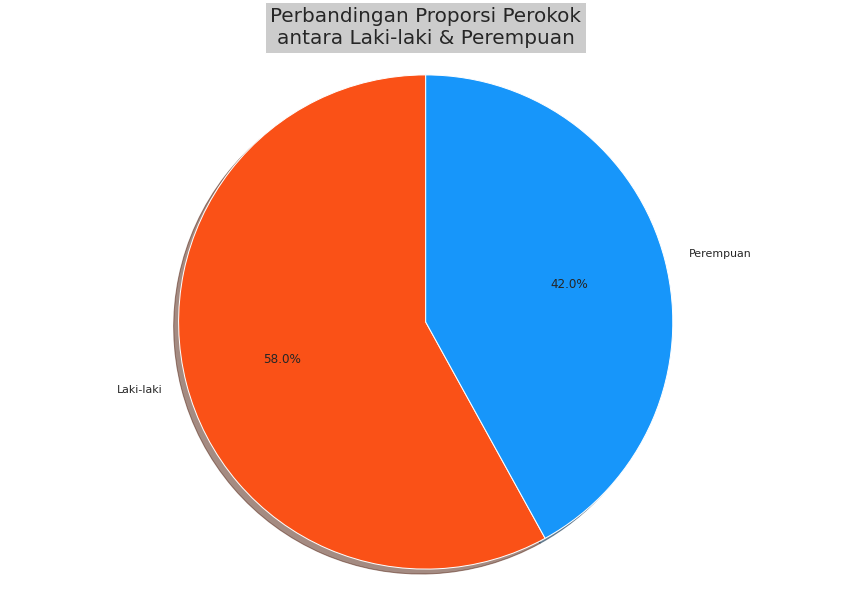

Peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok sebesar 41.9708%
Peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok sebesar 58.0292%
Dari 274 orang yang merupakan perokok, 58.03% atau 159 adalah laki-laki, dan 41.97% atau 115 adalah perempuan.


In [43]:
#@title 5 & 6 Peluang seseorang tersebut adalah perempuan/laki-laki jika diketahui dia adalah perokok
perokok_perempuan = pengguna_perokok['sex'] == 'female'
pengguna_perokok_perempuan = pengguna_perokok[perokok_perempuan]
n_perokok_perempuan = len(pengguna_perokok_perempuan)

perokok_laki_laki = pengguna_perokok['sex'] == 'male'
pengguna_perokok_laki_laki = pengguna_perokok[perokok_laki_laki]

n_perokok = len(pengguna_perokok)
n_perokok_perempuan = len(pengguna_perokok_perempuan) 
p_perempuan_merokok = n_perokok_perempuan / n_perokok *100
n_perokok_laki_laki = len(pengguna_perokok_laki_laki) 
p_laki_laki_merokok = n_perokok_laki_laki / n_perokok *100

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = 'Laki-laki', 'Perempuan'
sizes = [p_laki_laki_merokok, p_perempuan_merokok]
explode = (0, 0) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#fa5117', '#1796fa']

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Perbandingan Proporsi Perokok\n" + "antara Laki-laki & Perempuan", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()

print(f"Peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok sebesar {p_perempuan_merokok:.4f}%")
print(f"Peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok sebesar {p_laki_laki_merokok:.4f}%")
print(f"Dari {n_perokok} orang yang merupakan perokok, {p_laki_laki_merokok:.2f}% atau {n_perokok_laki_laki} adalah laki-laki, dan {p_perempuan_merokok:.2f}% atau {n_perokok_perempuan} adalah perempuan.")

## **Langkah 3 - Analisa Variabel Kontinu**

In [44]:
#@title Persiapan tabel BMI, tagihan & status merokok
bmi_charges_smoker = pd.DataFrame(data, columns = ['bmi', 'charges', 'smoker'])
bmi_charges_smoker

,bmi,charges,smoker
0,27.900,16884.92400,yes
1,33.770,1725.55230,no
2,33.000,4449.46200,no
3,22.705,21984.47061,no
4,28.880,3866.85520,no
...,...,...,...
1333,30.970,10600.54830,no
1334,31.920,2205.98080,no
1335,36.850,1629.83350,no
1336,25.800,2007.94500,no


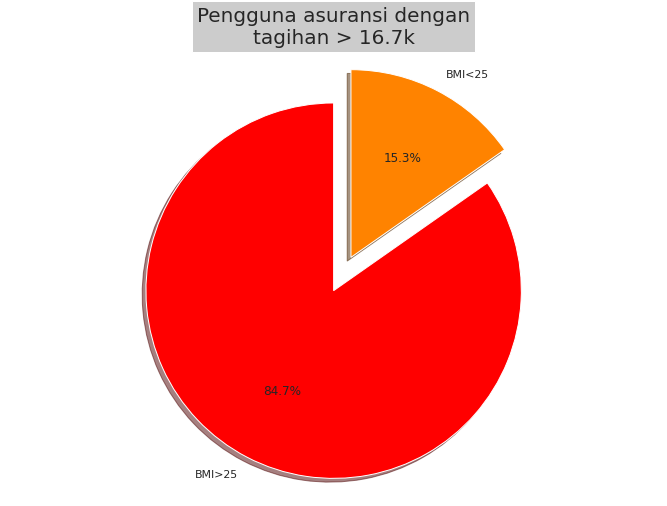

Jumlah peserta asuransi dengan tagihan>16.7k adalah sebanyak 334 orang
Jumlah peserta dengan tagihan > 16.7k adalah sebanyak 334 orang, n_BMI>25∩tag>16.7k=283 & n_BMI<25∩tag>16.7k=51
Jadi, peluang BMI > 25 & tagihan > 16.7k sebesar 0.85 dan BMI <=25 & tagihan > 16.7k sebesar 0.15


In [45]:
#@title 1. Mana yang lebih mungkin: Seseorang dengan BMI > 25 & tagihan  > 16.7k, atau BMI < 25 & tagihan >16.7k

#BMI > 25 & tagihan > 16.7k
bmi_charges_df = pd.DataFrame(data, columns = ['bmi','charges'])
bmi_25_up = bmi_charges_df.loc[(bmi_charges_df['bmi'] > 25) & (bmi_charges_df['charges'] > 16700)]
charges_16 = bmi_charges_df.loc[(bmi_charges_df['charges'] > 16700)]
n_charges = len(charges_16)
n_bmi_25_up = len(bmi_25_up)
p_bmi_25_up = n_bmi_25_up/n_charges

#BMI <= 25 & tagihan > 16.7k
bmi_25_max = bmi_charges_df.loc[(bmi_charges_df['bmi'] < 25) & (bmi_charges_df['charges'] > 16700)]
n_bmi_25_max = len(bmi_25_max)
p_bmi_25_max = n_bmi_25_max/n_charges

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = 'BMI>25', 'BMI<25'
sizes = [p_bmi_25_up, p_bmi_25_max]
explode = (0, 0.2) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#ff0000', '#ff8300']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Pengguna asuransi dengan\n" + "tagihan > 16.7k", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()

print(f"Jumlah peserta asuransi dengan tagihan>16.7k adalah sebanyak {n_charges} orang")
print(f"Jumlah peserta dengan tagihan > 16.7k adalah sebanyak {n_charges} orang, n_BMI>25∩tag>16.7k={n_bmi_25_up} & n_BMI<25∩tag>16.7k={n_bmi_25_max}")
print(f"Jadi, peluang BMI > 25 & tagihan > 16.7k sebesar {p_bmi_25_up:.2f} dan BMI <=25 & tagihan > 16.7k sebesar {p_bmi_25_max:.2f}")

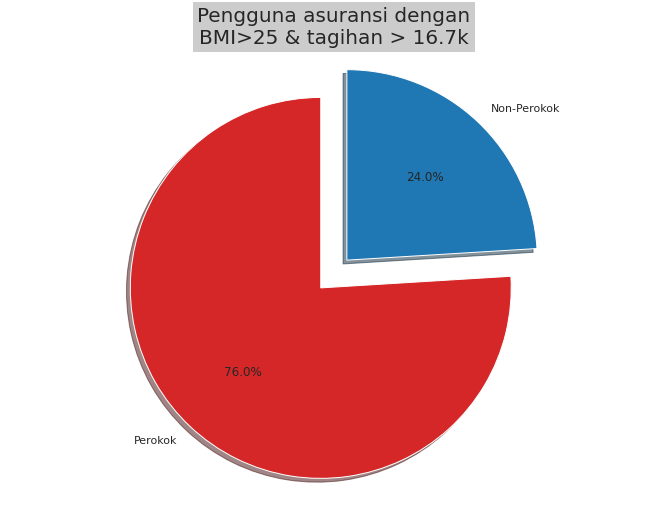

Jumlah peserta dengan BMI > 25 & tagihan > 16.7k adalah sebanyak 283 orang, dengan perokoknya sebanyak 215 & non-perokoknya sebanyak 68
Jadi, peluang seseorang dengan BMI > & tagihan > 16.7 adalah perokok sebesar 0.76 orang & bukan perokok sebesar 0.24 orang 


In [46]:
#@title 2. Mana yang lebih mungkin: Seseorang perokok, BMI > 25 & tagihan > 16.7k, atau non-perokok, BMI > 25  tagihan > 16.7k
# Pengerucutan data berdasarkan BMI, tagihan & status merokok
bmi_charges_smoker_df = pd.DataFrame(data, columns = ['bmi', 'charges', 'smoker'])
smoker_bmi_charges = bmi_charges_smoker_df.loc[(bmi_charges_smoker['bmi'] > 25) 
& (bmi_charges_smoker['charges'] > 16700) 
& (bmi_charges_smoker['smoker'] == 'yes')]

non_smoker_bmi_charges = bmi_charges_smoker_df.loc[(bmi_charges_smoker['bmi'] > 25) 
& (bmi_charges_smoker['charges'] > 16700) 
& (bmi_charges_smoker['smoker'] == 'no')]

bmi_charges = bmi_charges_smoker_df.loc[(bmi_charges_smoker['bmi'] > 25) 
& (bmi_charges_smoker['charges'] > 16700)]
n_bmi_charges = len(bmi_charges)

# Peluang seseorang adalah perokok dengan BMI> 25 & tagihan > 16.7k
n_smoker_bmi_charges = len(smoker_bmi_charges)
p_smoker_bmi_charges = n_smoker_bmi_charges/n_bmi_charges

# Peluang seseorang adalah bukan perokok dengan BMI> 25 & tagihan > 16.7k
n_non_smoker_bmi_charges = len(non_smoker_bmi_charges)
p_non_smoker_bmi_charges = n_non_smoker_bmi_charges/n_bmi_charges

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = 'Perokok', 'Non-Perokok'
sizes = [p_smoker_bmi_charges, p_non_smoker_bmi_charges]
explode = (0, 0.2) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#d62728', '#1f77b4']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Pengguna asuransi dengan\n" + "BMI>25 & tagihan > 16.7k", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()
print(f"Jumlah peserta dengan BMI > 25 & tagihan > 16.7k adalah sebanyak {n_bmi_charges} orang, dengan perokoknya sebanyak {n_smoker_bmi_charges} & non-perokoknya sebanyak {n_non_smoker_bmi_charges}")
print(f"Jadi, peluang seseorang dengan BMI > & tagihan > 16.7 adalah perokok sebesar {p_smoker_bmi_charges:.2f} orang & bukan perokok sebesar {p_non_smoker_bmi_charges:.2f} orang ")

## **Langkah 4 - Analisa Korelasi Variabel**

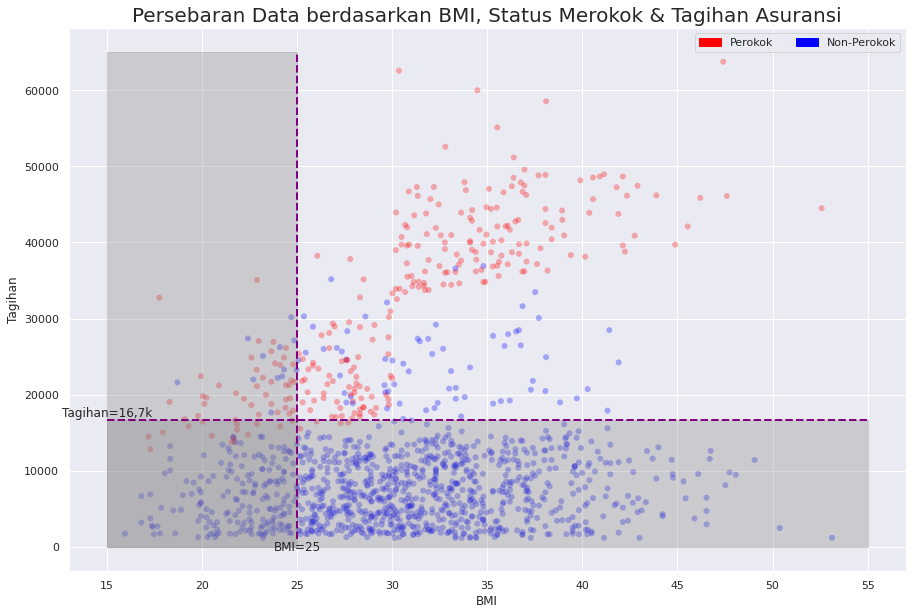

In [47]:
#@title Korelasi antara Status Merokok terhadap Tagihan Asuransi

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# Penempatan Scatter Plot berdasarkan BMI, tagihan & status merokok
fig, ax = plt.subplots(figsize=(15,10))
smoker =['yes','no']*25
colors = {'yes':'red', 'no':'blue'}

# Penulisan judul, label x & y
plt.title('Persebaran Data berdasarkan BMI, Status Merokok & Tagihan Asuransi', fontsize=20)
plt.ylabel('Tagihan')
plt.xlabel('BMI')

# Penentuan warna sebagai pembeda variabel perokok & non-perokok
x = df3['bmi']
y = df3['charges']
ax.scatter(x, y, c=df3['smoker'].map(colors),
               alpha=0.3, edgecolors='none')
color = ["red", "blue"]
texts = ["Perokok", "Non-Perokok"]

# Pencantuman garis batas tagihan 16,7k & BMI 25
bmi_limit = plt.vlines(x=[25], ymin=[1000], ymax=[65000], colors='purple', linestyles='--', lw=2, label='BMI 25')
plt.text(25, -10, 'BMI=25', ha='center', va='center')
tagihan_limit = plt.hlines(y=[16700], xmin=[15], xmax=[55], colors='purple', linestyles='--', lw=2, label='Tagihan 16,7k')
plt.text(15, 16700, 'Tagihan=16,7k', ha='center', va='bottom')
# Koordinat buffer daerah BMI <25
x2 = np.array([15, 25])
y2 = np.array([65000, 65000])
# Koordinat buffer daerah tagihan <16.7k
x3 = np.array([15, 55])
y3 = np.array([16700, 16700])


# Buffering warna untuk daerah di bawah batas tagihan <= 16,7k & BMI <=25
plt.fill_between(x2, y2, color='grey', alpha=0.3)
plt.fill_between(x3, y3, color='grey', alpha=0.3)

patches = [ mpatches.Patch(color=color[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
legend = plt.legend(handles=patches, ncol=2)
ax.grid(True)

plt.show()

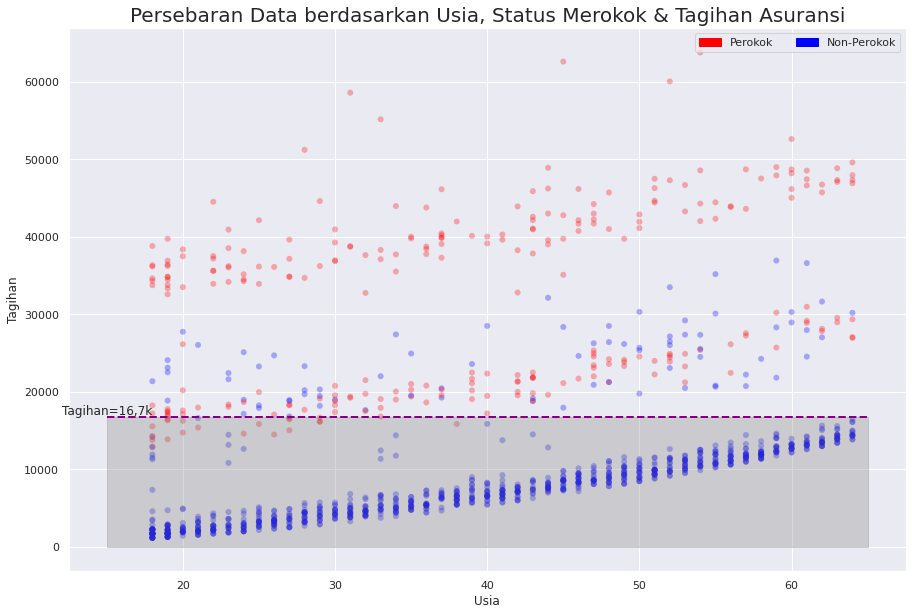

In [48]:
#@title Korelasi antara Status Merokok terhadap Tagihan Asuransi

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# Penempatan Scatter Plot berdasarkan usia, tagihan & status merokok
fig, ax = plt.subplots(figsize=(15,10))
smoker =['yes','no']*25
colors = {'yes':'red', 'no':'blue'}

# Penulisan judul, label x & y
plt.title('Persebaran Data berdasarkan Usia, Status Merokok & Tagihan Asuransi', fontsize=20)
plt.ylabel('Tagihan')
plt.xlabel('Usia')

# Penentuan warna sebagai pembeda variabel perokok & non-perokok
x = df3['age']
y = df3['charges']
ax.scatter(x, y, c=df3['smoker'].map(colors),
               alpha=0.3, edgecolors='none')
color = ["red", "blue"]
texts = ["Perokok", "Non-Perokok"]

# Menaruh garis batas tagihan <=16.7k
tagihan_limit = plt.hlines(y=[16700], xmin=[15], xmax=[65], colors='purple', linestyles='--', lw=2, label='Tagihan 16,7k')
plt.text(15, 16700, 'Tagihan=16,7k', ha='center', va='bottom')
# Koordinat buffer daerah tagihan <=16.7k
x3 = np.array([15, 65])
y3 = np.array([16700, 16700])


# Buffering warna untuk daerah di bawah batas tagihan <= 16,7k
plt.fill_between(x3, y3, color='grey', alpha=0.3)

patches = [ mpatches.Patch(color=color[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
legend = plt.legend(handles=patches, ncol=2)
ax.grid(True)

plt.show()

In [49]:
# DataFrame tagihan>16.7k & <16.7k
charges_16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] > 16700)]
charges_below16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] <= 16700)]

# DataFrame status perokok & non-perokok
smoker = bmi_charges_smoker_df.loc[(bmi_charges_smoker['smoker'] == 'yes')]
nosmoker = bmi_charges_smoker_df.loc[(bmi_charges_smoker['smoker'] == 'no')]

# DataFrame BMI>25 & BMI<25
bmi25_up = bmi_charges_smoker_df.loc[(bmi_charges_smoker['bmi'] > 25)]
bmi25_below = bmi_charges_smoker_df.loc[(bmi_charges_smoker['bmi'] <= 25)]

# DataFrame tagihan>16.7k dengan BMI>25 & BMI<25
c16kup_25up = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] > 16700)
& (bmi_charges_smoker['bmi'] > 25)]
c16kup_25below = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] > 16700)
& (bmi_charges_smoker['bmi'] <= 25)]

# DataFrame tagihan<=16.7k dengan BMI>25 & BMI<25
c16kbelow_25up = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] <= 16700)
& (bmi_charges_smoker['bmi'] > 25)]
c16kbelow_25below = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] <= 16700)
& (bmi_charges_smoker['bmi'] <= 25)]

# DataFrame perokok dgn tagihan > 16.7k & <16.7k
smoker_upper16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] > 16700)
& (bmi_charges_smoker['smoker'] == 'yes')]
smoker_below16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] <= 16700)
& (bmi_charges_smoker['smoker'] == 'yes')]

# DataFrame non-perokok dgn tagihan > 16.7k & <16.7k
nosmoker_upper16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] > 16700) 
& (bmi_charges_smoker['smoker'] == 'no')]
nosmoker_below16k = bmi_charges_smoker_df.loc[(bmi_charges_smoker['charges'] <= 16700) 
& (bmi_charges_smoker['smoker'] == 'no')]


# Persentase orang dgn tagihan > 16.7k diketahui adalah perokok
upper16k_known_smoker = len(smoker_upper16k)/len(smoker)

# Persentase orang dgn tagihan < 16.7k diketahui adalah perokok
below16k_known_smoker = len(smoker_below16k)/len(smoker)

# Persentase orang dgn tagihan > 16.7k diketahui adalah non-perokok
upper16k_known_nosmoker = len(nosmoker_upper16k)/len(nosmoker)

# Persentase orang dgn tagihan < 16.7k diketahui adalah non-perokok
below16k_known_nosmoker = len(nosmoker_below16k)/len(nosmoker)

# Persentase perokok/non-perokok diketahui tagihan>16.7k
smoker_known_16k = len(smoker_upper16k)/len(charges_16k)
nosmoker_known_16k = len(nosmoker_upper16k)/len(charges_16k)

# Persentase perokok/non-perokok diketahui tagihan<16.7k
smoker_known_below16k = len(smoker_below16k)/len(charges_below16k)
nosmoker_known_below16k = len(nosmoker_below16k)/len(charges_below16k)

# Persentase tagihan diketahui BMI>25
upper16k_known_bmi25up = len(c16kup_25up)/len(bmi25_up)
below16k_known_bmi25up = len(c16kbelow_25up)/len(bmi25_up)

# Persentase tagihan diketahui BMI<25
upper16k_known_bmi25below = len(c16kup_25below)/len(bmi25_below)
below16k_known_bmi25below = len(c16kbelow_25below)/len(bmi25_below)

print(f"Pada BMI>25({len(bmi25_up)}), terdapat pemilik tagihan>16.7k sebanyak {len(c16kup_25up)}({upper16k_known_bmi25up*100:.2f}%) & tagihan<16.7k sebanyak {len(c16kbelow_25up)}({below16k_known_bmi25up*100:.2f}%)")
print(f"Pada BMI<25({len(bmi25_below)}), terdapat pemilik tagihan>16.7k sebanyak {len(c16kup_25below)}({upper16k_known_bmi25below*100:.2f}%) & tagihan<16.7k sebanyak {len(c16kbelow_25below)}({below16k_known_bmi25below*100:.2f}%)")
print(f"Pada tagihan >16.7k({len(charges_16k)}), didominasi oleh perokok dengan porsi sebesar {len(smoker_upper16k)}({smoker_known_16k*100:.2f})% sementara non-perokok sebesar {len(nosmoker_upper16k)}({nosmoker_known_16k*100:.2f}%)")
print(f"Pada tagihan <16.7k({len(charges_below16k)}), terdapat perokok dengan porsi sebesar {len(smoker_below16k)}({smoker_known_below16k*100:.2f})% sementara non-perokok sebesar {len(nosmoker_below16k)}({nosmoker_known_below16k*100:.2f}%)")
print(f"Dari keseluruhan perokok({len(smoker)}), yang memiliki tagihan<16.7k {len(smoker_below16k)}({below16k_known_smoker*100:.2f}%) & tagihan>16,7k sebesar {len(smoker_upper16k)}({upper16k_known_smoker*100:.2f}%)")
print(f"Dari keseluruhan non-perokok({len(nosmoker)}), yang memiliki tagihan<16.7k {len(nosmoker_below16k)}({below16k_known_nosmoker*100:.2f})% & tagihan>16,7k sebesar {len(nosmoker_upper16k)}({upper16k_known_nosmoker*100:.2f}%)")

Pada BMI>25(1091), terdapat pemilik tagihan>16.7k sebanyak 283(25.94%) & tagihan<16.7k sebanyak 808(74.06%)
Pada BMI<25(247), terdapat pemilik tagihan>16.7k sebanyak 51(20.65%) & tagihan<16.7k sebanyak 196(79.35%)
Pada tagihan >16.7k(334), didominasi oleh perokok dengan porsi sebesar 254(76.05)% sementara non-perokok sebesar 80(23.95%)
Pada tagihan <16.7k(1004), terdapat perokok dengan porsi sebesar 20(1.99)% sementara non-perokok sebesar 984(98.01%)
Dari keseluruhan perokok(274), yang memiliki tagihan<16.7k 20(7.30%) & tagihan>16,7k sebesar 254(92.70%)
Dari keseluruhan non-perokok(1064), yang memiliki tagihan<16.7k 984(92.48)% & tagihan>16,7k sebesar 80(7.52%)


## Conditional Probability terkait Status Merokok, Tagihan & BMI

Besar tagihan diketahui adalah perokok:
$$P(Tagihan>16.700 | Perokok) = 92.7/100$$
$$P(Tagihan<16.700 | Perokok) = 7.3/100$$

Porsi orang berdasarkan status merokok diketahui tagihan > 16.700:
$$P(Perokok | Tagihan>16.700) = 76.05/100$$
$$P(Non-Perokok | Tagihan>16.700) = 23.95/100$$

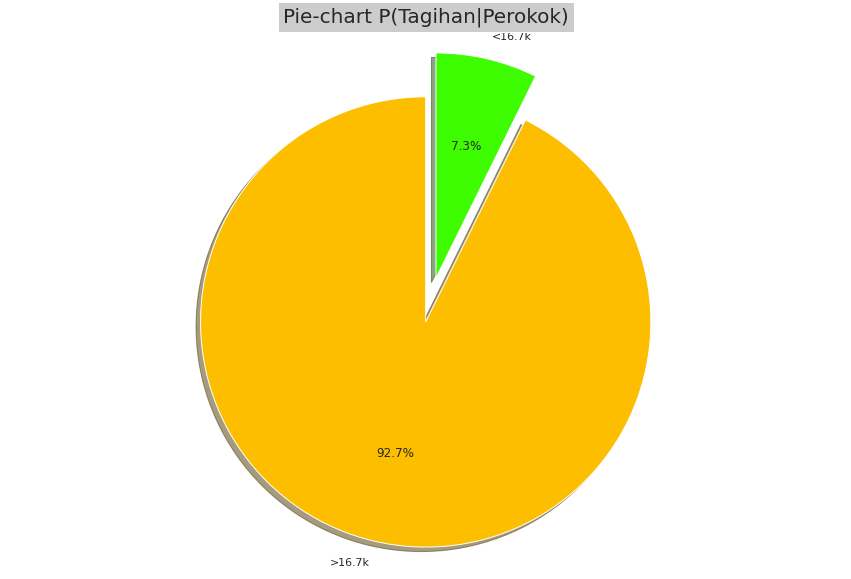

In [50]:
#@title Pie-chart P(Tagihan|Perokok)

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = '>16.7k', '<16.7k'
sizes = [upper16k_known_smoker, below16k_known_smoker]
explode = (0, 0.2) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#fdbe00', '#3efd00']

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Pie-chart P(Tagihan|Perokok)", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()

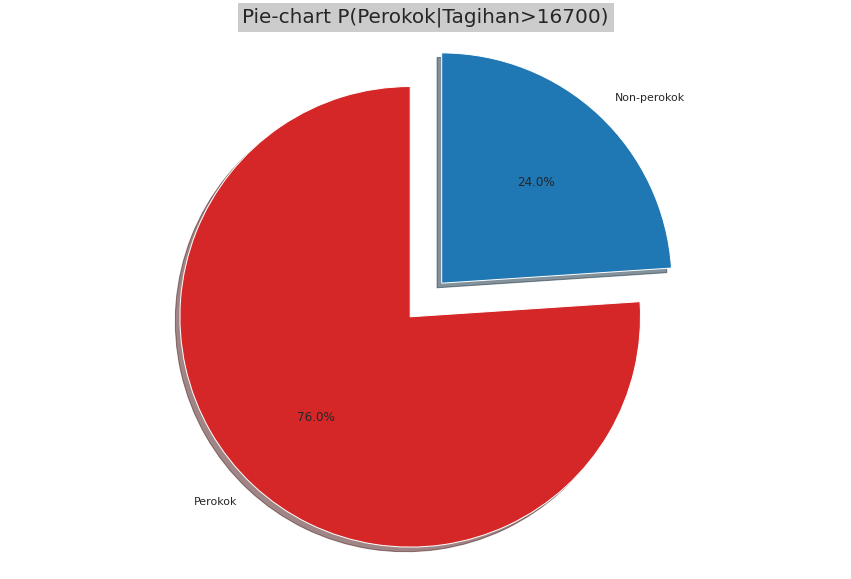

In [51]:
#@title Pie-chart P(Perokok|Tagihan>16700)

# Menempatkan data pada Pie chart, urutan berlawanan jarum jam
labels = 'Perokok', 'Non-perokok'
sizes = [smoker_known_16k, nosmoker_known_16k]
explode = (0, 0.2) # Menentukan bagan data manakah (urutan data berlawanan jarum jam) yang perlu diangkat terpisah, dan berapa jarak pemisahnya
# Menentukan warna
colors = ['#d62728', '#1f77b4']

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Membentuk bagan berupa lingkaran/pie chart
plt.title("Pie-chart P(Perokok|Tagihan>16700)", fontsize=20, bbox={'facecolor':'0.8', 'pad':5}) # Mencantumkan judul, dengan latar warna, ukuran dan enter karakter
plt.show()

Rumus Covariance 
sample:
$$ \ Cov(x,y)=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1} $$

Rumus Covariance 
populasi:
$$ \ Cov(x,y)=\frac{\sum_{i=1}^{n}(x_{i}-\mu _{x})(y_{i}-\mu _{y})}{n} $$

Rumus Correlation sample:
$$ \rho (X,Y)=\frac{Cov(X,Y)}{\sqrt{s_{X}^{2}}\sqrt{s_{Y}^{2}}} $$

Rumus Correlation populasi:
$$ \rho (X,Y)=\frac{Cov(X,Y)}{\sqrt{\sigma_{X}^{2}}\sqrt{\sigma_{Y}^{2}}} $$


In [52]:
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])
np.cov(df3['bmi'], df3['charges'])

array([[3.71878836e+01, 1.46473044e+04],
       [1.46473044e+04, 1.46652372e+08]])

## **Covariance antara BMI (x) dan tagihan (y):**

$$\bar{x}=30.66$$
$$\bar{y}=13270.42$$
$$n=1338$$

In [75]:
# Mengubah status merokok yes no menjadi 1 0
df3.smoker.replace(('yes', 'no'), (1, 0), inplace=True)

# Menghitung parameter korelasi tiap faktor yang diamati
# BMI
mean_bmi = df3['bmi'].mean()
var_bmi = df3['bmi'].var()

# Umur
mean_age = df3['age'].mean()
var_age = df3['age'].var()

# Tagihan
mean_charges = df3['charges'].mean()
var_charges = df3['charges'].var()

# Status merokok
mean_smoker = df3['smoker'].mean()
var_smoker = df3['smoker'].var()

print(f"Rata-rata: BMI={mean_bmi:.2f}, umur={mean_age:.2f}, tagihan={mean_charges:.2f}, status merokok={mean_smoker:.2f}")
print(f"Varians: BMI={var_bmi:.2f}, umur={var_age:.2f}, tagihan={var_charges:.2f}, status merokok{var_smoker:.2f}")

Rata-rata: BMI=30.66, umur=39.21, tagihan=13270.42, status merokok=0.20
Varians: BMI=37.19, umur=197.40, tagihan=146652372.15, status merokok0.16


## Korelasi antara Status Merokok dengan Tagihan

In [76]:
# Menghitung korelasi antara status merokok dengan tagihan
df3[['smoker', 'charges']].corr()

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


## Korelasi antara BMI dengan Tagihan

In [59]:
# Menghitung keseluruhan korelasi antara BMI dengan tagihan
df3[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


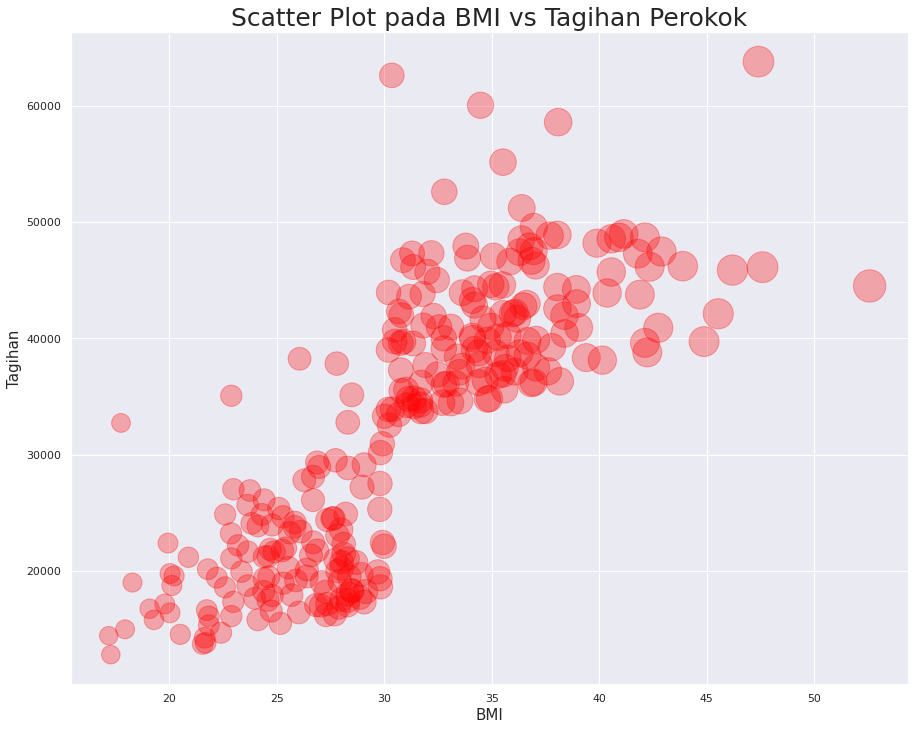

In [86]:
#@title Persebaran BMI vs Tagihan pada Perokok

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes'
smoker_yes_df = df3[df3['smoker'] == 'yes']

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_df['bmi'], smoker_yes_df['charges'], c='red', alpha=0.3, s=smoker_yes_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Perokok', fontsize=25)

plt.show()

Text(0.5, 1.0, 'Scatter Plot pada BMI vs Tagihan Perokok dgn BMI <= 25')

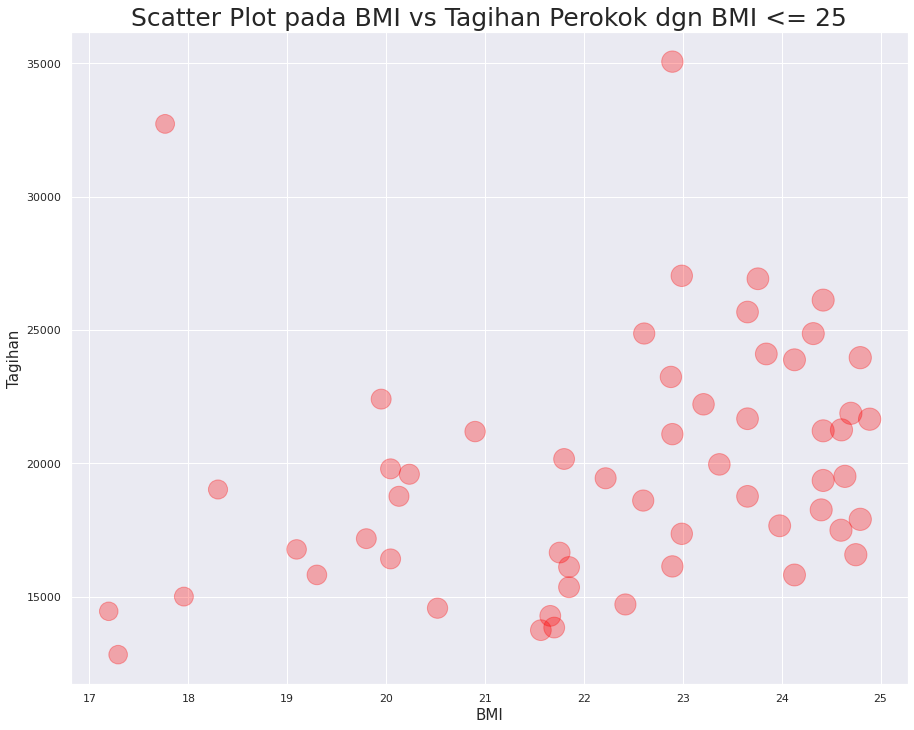

In [84]:
#@title Persebaran BMI vs Tagihan pada Perokok dgn BMI <=25

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes' & 'bmi' <= 25
smoker_yes_bmi25_df = df3[(df3['smoker'] == 'yes') & (df3['bmi'] <= 25)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_bmi25_df['bmi'], smoker_yes_bmi25_df['charges'], c='red', alpha=0.3, s=smoker_yes_bmi25_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Perokok dgn BMI <= 25', fontsize=25)


Text(0.5, 1.0, 'Scatter Plot pada BMI vs Tagihan Perokok dgn BMI > 25')

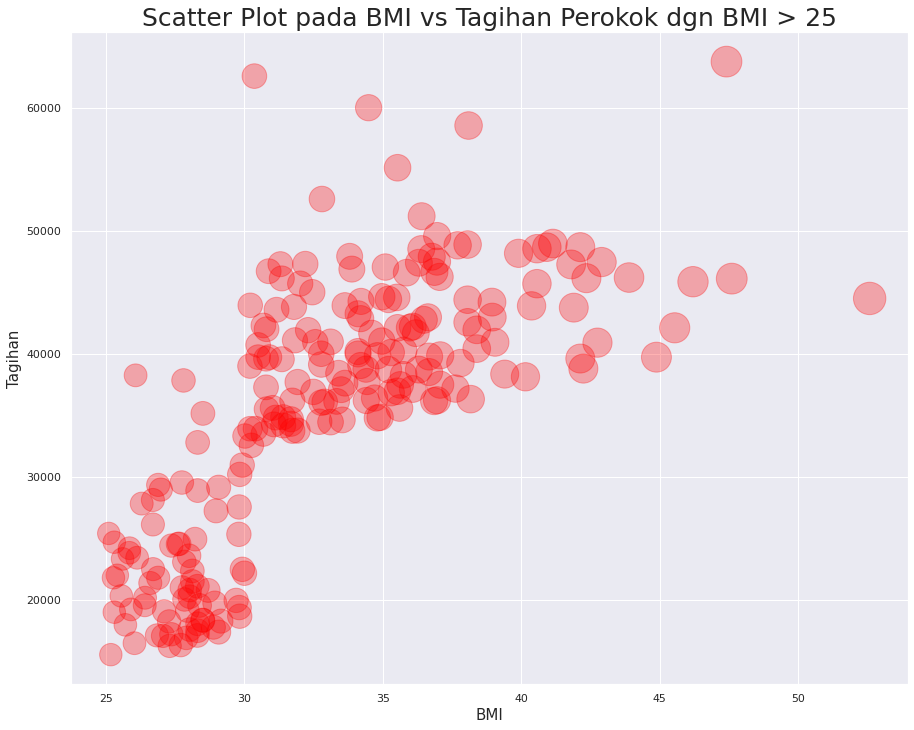

In [83]:
#@title Persebaran BMI vs Tagihan pada Perokok dgn BMI >25

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes' & 'bmi' > 25
smoker_yes_bmi25_df = df3[(df3['smoker'] == 'yes') & (df3['bmi'] > 25)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_bmi25_df['bmi'], smoker_yes_bmi25_df['charges'], c='red', alpha=0.3, s=smoker_yes_bmi25_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Perokok dgn BMI > 25', fontsize=25)

### Korelasi BMI vs Tagihan para Perokok

In [61]:
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes'
smoker_yes_df = df3[df3['smoker'] == 'yes']

# calculate the correlation between bmi and charges for the selected rows
bmi_charges_corr = smoker_yes_df[['bmi', 'charges']].corr()

# print the correlation coefficient
print('Korelasi BMI-tagihan perokok:')
print(bmi_charges_corr.loc['bmi', 'charges'])

Korelasi BMI-tagihan perokok:
0.8064806070155407


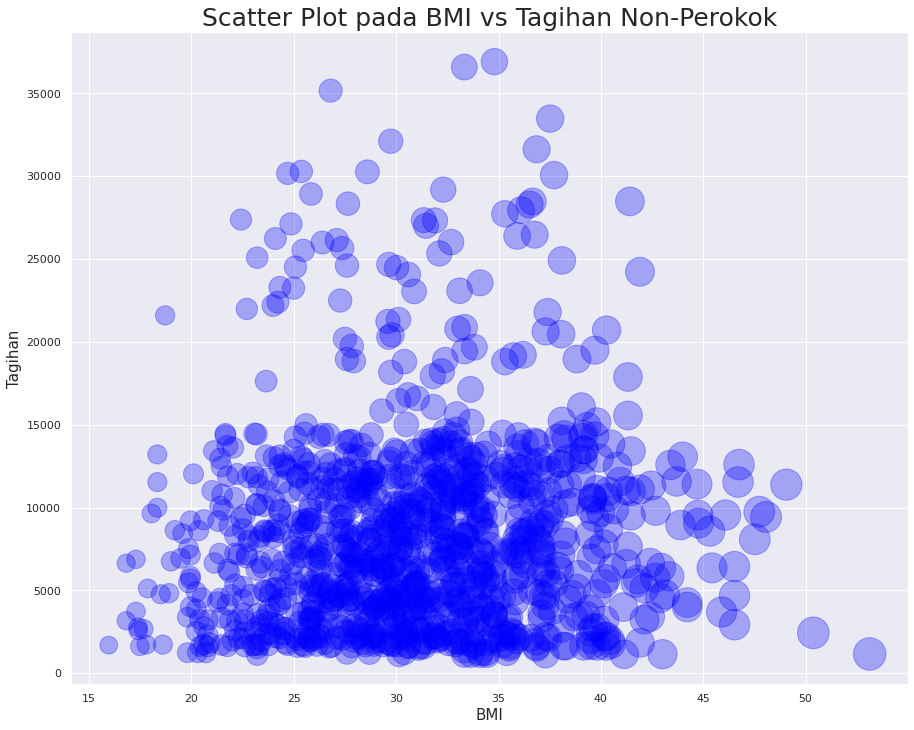

In [85]:
#@title Persebaran BMI vs Tagihan pada Non-Perokok

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'no'
smoker_no_df = df3[df3['smoker'] == 'no']

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_no_df['bmi'], smoker_no_df['charges'], c='blue', alpha=0.3, s=smoker_no_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Non-Perokok', fontsize=25)

plt.show()

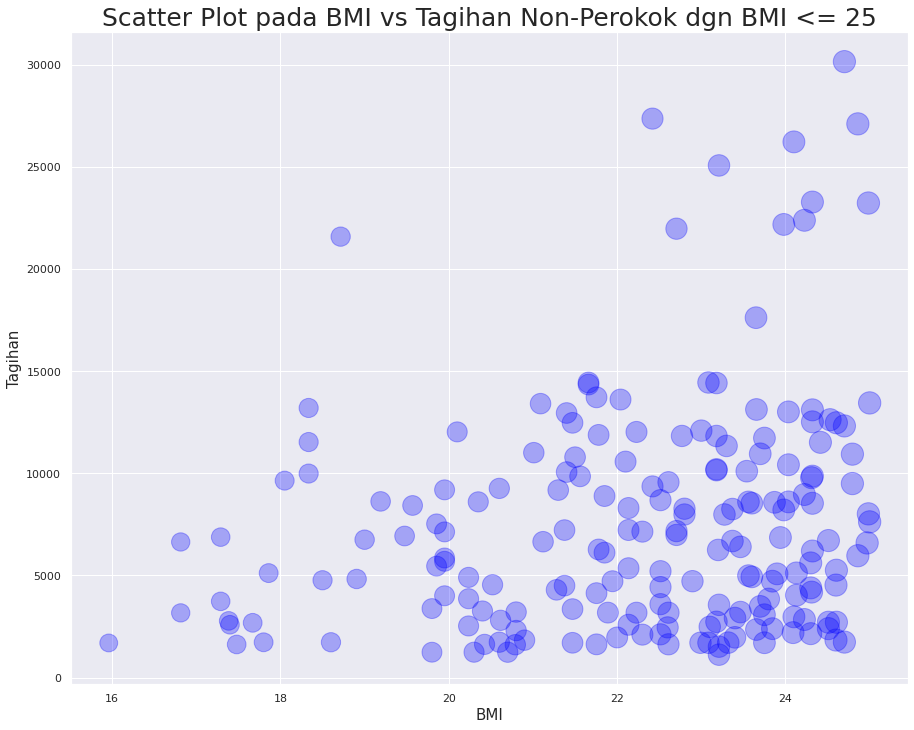

In [90]:
#@title Persebaran BMI vs Tagihan pada Non-Perokok dgn BMI <= 25

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'no'
smoker_no_bmi25_df = df3[(df3['smoker'] == 'no') & (df3['bmi'] <= 25)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_no_bmi25_df['bmi'], smoker_no_bmi25_df['charges'], c='blue', alpha=0.3, s=smoker_no_bmi25_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Non-Perokok dgn BMI <= 25', fontsize=25)

plt.show()

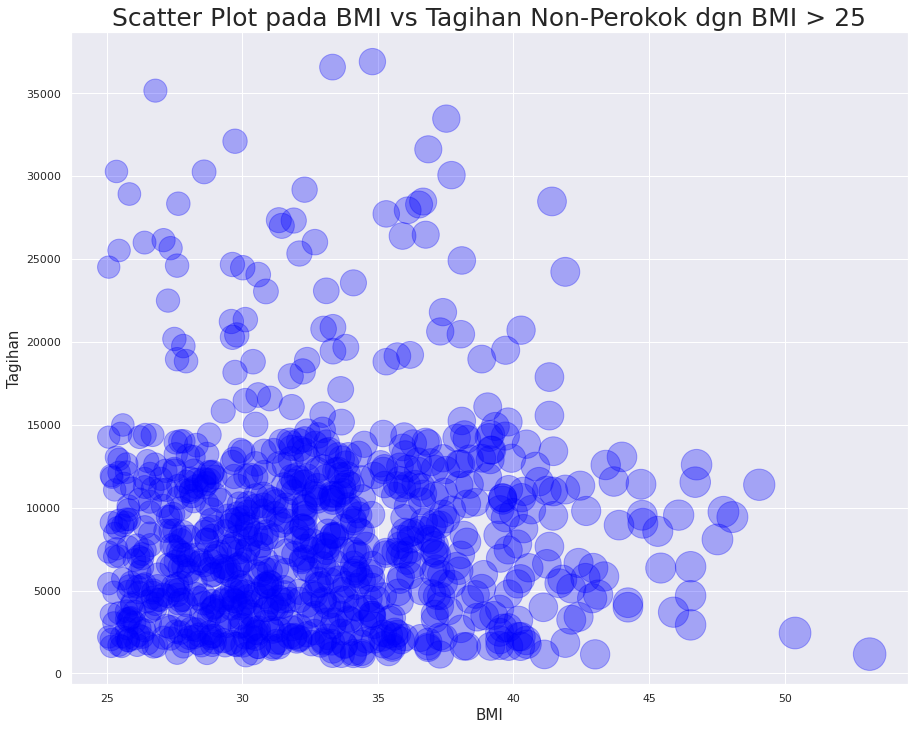

In [89]:
#@title Persebaran BMI vs Tagihan pada Non-Perokok dgn BMI > 25

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'no'
smoker_no_bmi25_df = df3[(df3['smoker'] == 'no') & (df3['bmi'] > 25)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_no_bmi25_df['bmi'], smoker_no_bmi25_df['charges'], c='blue', alpha=0.3, s=smoker_no_bmi25_df['bmi']*20)

# add axis labels and title
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada BMI vs Tagihan Non-Perokok dgn BMI > 25', fontsize=25)

plt.show()

### Korelasi BMI vs Tagihan para Non-Perokok

In [62]:
# filter the dataframe to select only rows where smoker == 'no'
smoker_no_df = df3[df3['smoker'] == 'no']

# calculate the correlation between bmi and charges for the selected rows
bmi_charges_corr = smoker_no_df[['bmi', 'charges']].corr()

# print the correlation coefficient
print('Korelasi BMI-tagihan non-perokok:')
print(bmi_charges_corr.loc['bmi', 'charges'])

Korelasi BMI-tagihan non-perokok:
0.08403654312833286


In [64]:
x = df3['smoker']
y = df3['charges']

import scipy.stats as stats
#calculate point-biserial correlation
stats.pointbiserialr(x, y)

TypeError: ignored

## Korelasi antara Umur dengan Tagihan

In [65]:
# Menghitung korelasi antara umur dengan tagihan
df2[['age', 'charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


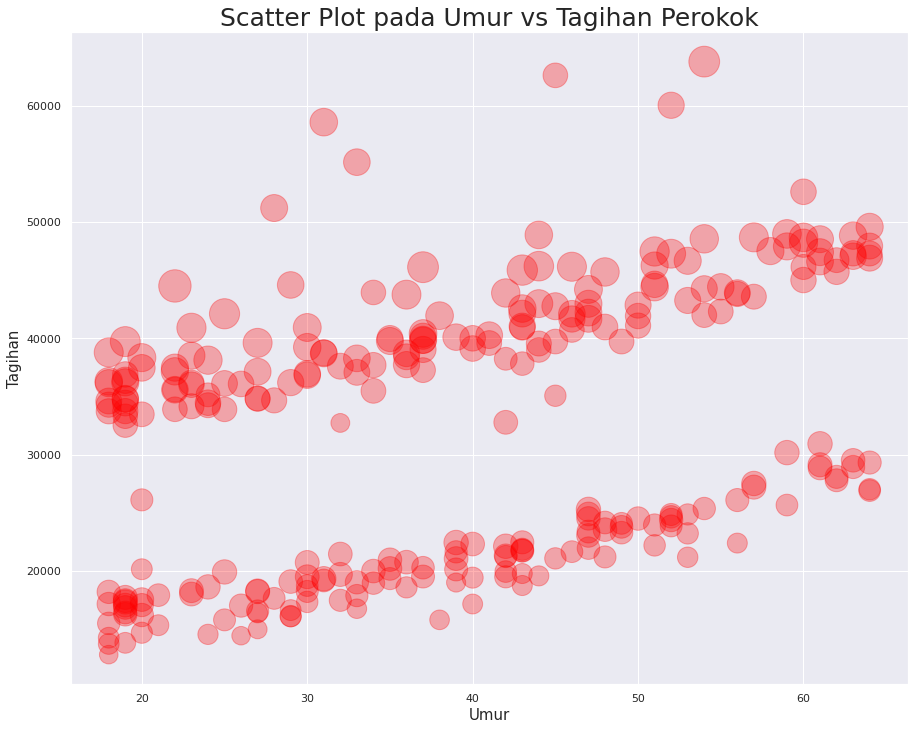

In [66]:
#@title Persebaran Umur vs Tagihan pada Perokok

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes'
smoker_yes_df = df3[df3['smoker'] == 'yes']

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_df['age'], smoker_yes_df['charges'], c='red', alpha=0.3, s=smoker_yes_df['bmi']*20)

# add axis labels and title
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada Umur vs Tagihan Perokok', fontsize=25)

plt.show()

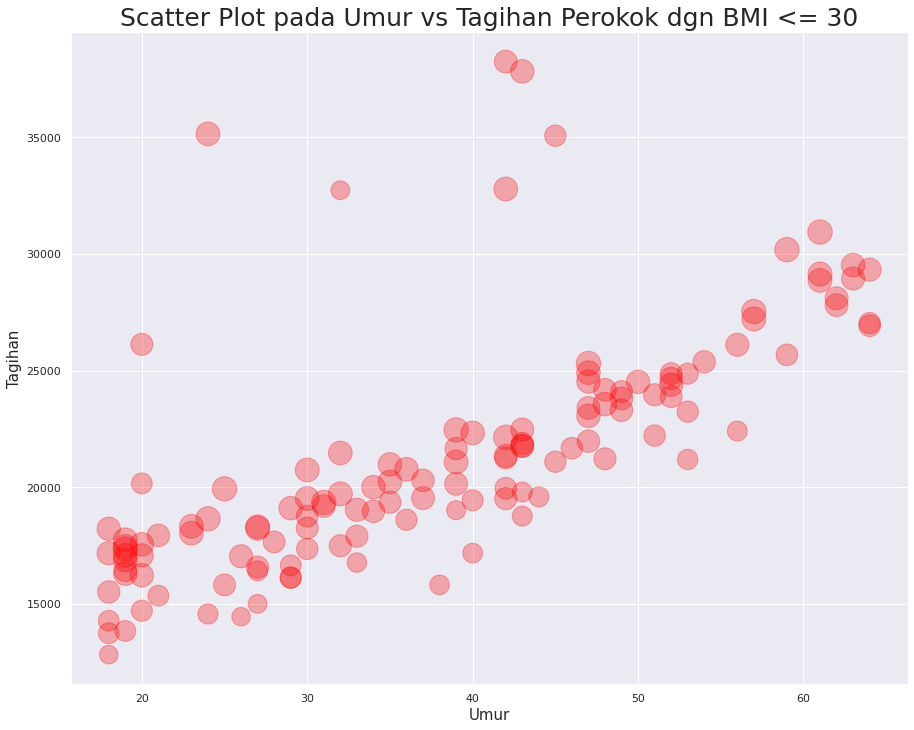

In [99]:
#@title Persebaran Umur vs Tagihan pada Perokok dgn BMI <= 30

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes'
smoker_yes_low_df = df3[(df3['smoker'] == 'yes') & (df3['bmi'] <= 30)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_low_df['age'], smoker_yes_low_df['charges'], c='red', alpha=0.3, s=smoker_yes_low_df['bmi']*20)

# add axis labels and title
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada Umur vs Tagihan Perokok dgn BMI <= 30', fontsize=25)

plt.show()

In [102]:
#@title Korelasi Umur vs Tagihan dgn BMI <= 30
# Menghitung korelasi antara umur dengan tagihan
df3[df3['bmi']<=30][df3['smoker']=='yes'][['age','charges']].corr()

<ipython-input-102-8e585df6eafd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['bmi']<=30][df3['smoker']=='yes'][['age','charges']].corr()


,age,charges
age,1.000000,0.694177
charges,0.694177,1.000000


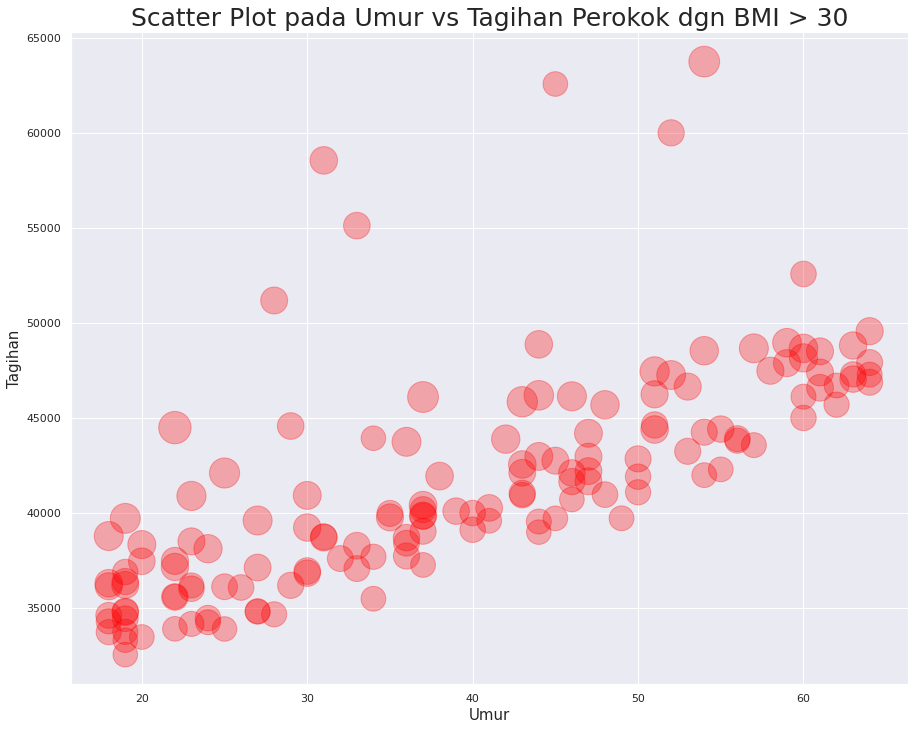

In [98]:
#@title Persebaran Umur vs Tagihan pada Perokok dgn BMI > 30

# Persiapan Tabel untuk Scatter Plot
df3 = pd.DataFrame(data, columns = ['bmi', 'age', 'charges', 'smoker'])

# filter the dataframe to select only rows where smoker == 'yes'
smoker_yes_high_df = df3[(df3['smoker'] == 'yes') & (df3['bmi'] > 30)]

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'age' vs 'charges' for the selected rows
scatter = plt.scatter(smoker_yes_high_df['age'], smoker_yes_high_df['charges'], c='red', alpha=0.3, s=smoker_yes_high_df['bmi']*20)

# add axis labels and title
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada Umur vs Tagihan Perokok dgn BMI > 30', fontsize=25)

plt.show()

In [103]:
#@title Korelasi Umur vs Tagihan dgn BMI > 30
# Menghitung korelasi antara umur dengan tagihan
df3[df3['bmi']>30][df3['smoker']=='yes'][['age','charges']].corr()

<ipython-input-103-8706dfd97df3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['bmi']>30][df3['smoker']=='yes'][['age','charges']].corr()


,age,charges
age,1.00000,0.69757
charges,0.69757,1.00000


### Korelasi antara Umur vs Tagihan para Perokok

In [67]:
# Memfilter dataframe untuk peserta yang merokok
smoker_yes_df = df3[df3['smoker'] == 'yes']

# Menghitung korelasi antara BMI & tagihan pada perokok
age_charges_corr = smoker_yes_df[['age', 'charges']].corr()

# print koefisien korelasi
print('Korelasi umur vs tagihan pada perokok:')
print(age_charges_corr.loc['age', 'charges'])

Korelasi umur vs tagihan pada perokok:
0.3682244437307775


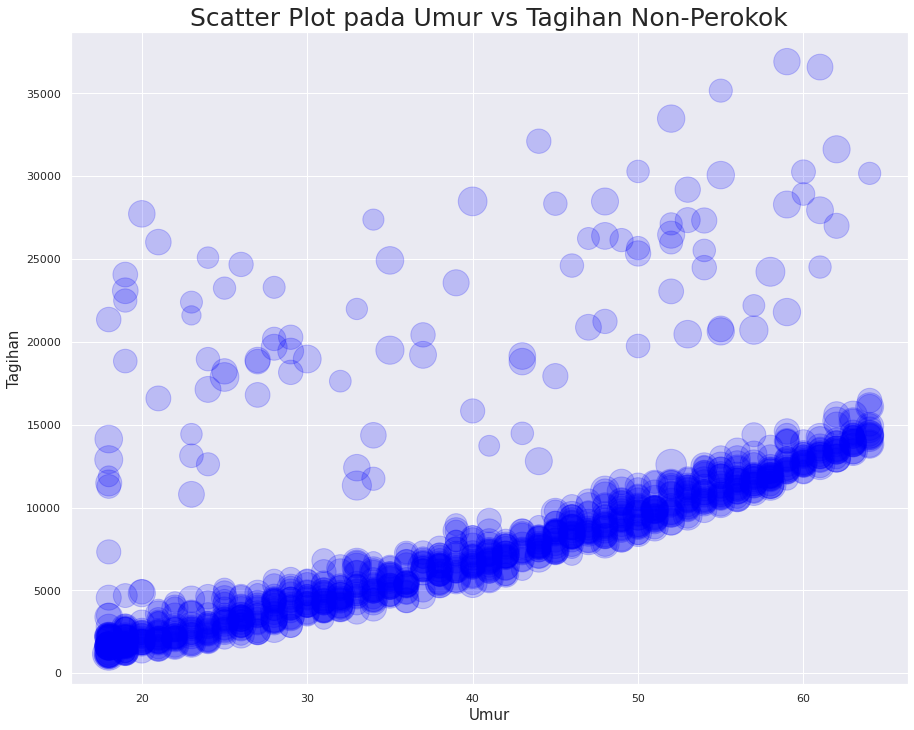

In [68]:
#@title Persebaran Umur vs Tagihan pada Non-Perokok
# filter the dataframe to select only rows where smoker == 'yes'
smoker_no_df = df3[df3['smoker'] == 'no']

# create a new figure with a larger size
plt.figure(figsize=(15, 12))

# plot a scatter plot of 'bmi' vs 'charges' for the selected rows
plt.scatter(smoker_no_df['age'], smoker_no_df['charges'], c='blue', alpha=0.2, s=smoker_no_df['bmi']*20)

# add axis labels and title
plt.xlabel('Umur', fontsize=15)
plt.ylabel('Tagihan', fontsize=15)
plt.title('Scatter Plot pada Umur vs Tagihan Non-Perokok', fontsize=25)
plt.show()

### Korelasi antara Umur vs Tagihan para Non-Perokok

In [69]:
# Memfilter dataframe untuk peserta yang tidak merokok
smoker_no_df = df3[df3['smoker'] == 'no']

# Menghitung korelasi antara BMI & tagihan pada non-perokok
age_charges_corr = smoker_no_df[['age', 'charges']].corr()

# print koefisien korelasi
print('Korelasi umur vs tagihan pada non-perokok:')
print(age_charges_corr.loc['age', 'charges'])

Korelasi umur vs tagihan pada non-perokok:
0.6279467837664197


## **Langkah 5 - Pengujian Hipotesis**

In [70]:
#@title Tabulasi tagihan perokok (tanpa sort value)
df4 = pd.DataFrame(data, columns = ['charges', 'smoker'])
df4_perokok = df4.loc[df4['smoker'] == 'yes']
df4_perokok.rename(columns = {'charges':'perokok'}, inplace = True)
df4_perokok = df4_perokok.reset_index()
df4_perokok = df4_perokok[['perokok']]
df4_perokok

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,perokok
0,16884.92400
1,27808.72510
2,39611.75770
3,36837.46700
4,37701.87680
...,...
269,36397.57600
270,18765.87545
271,28101.33305
272,43896.37630


In [71]:
#@title Tabulasi tagihan non-perokok(tanpa sort value)
df4 = pd.DataFrame(data, columns = ['charges', 'smoker'])
df4_non_perokok = df4.loc[df4['smoker'] == 'no']
df4_non_perokok.rename(columns = {'charges':'non_perokok'}, inplace = True)
df4_non_perokok = df4_non_perokok.reset_index()
df4_non_perokok = df4_non_perokok[['non_perokok']]
df4_non_perokok

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,non_perokok
0,1725.55230
1,4449.46200
2,21984.47061
3,3866.85520
4,3756.62160
...,...
1059,11411.68500
1060,10600.54830
1061,2205.98080
1062,1629.83350


## **Uji Statistik tagihan perokok lebih tinggi dari non-perokok**

Uji hipotesis rata-rata dua populasi/sampel dengan distribusi t:
$$ t = \frac{\bar{x_1}-\bar{x_1}}{\sqrt{s^2/n_1+s^2/n_2}}$$

Maka hipotesis yang akan kita uji adalah:

$$H_0: \bar{x_1} \leq \bar{x_2}$$

$$H_1: \bar{x_1} > \bar{x_2}$$



In [ ]:
# Mencari nilai kritis t
t_crit = stats.t.ppf(q=1-.05,df=273)
t_crit

In [ ]:
# Cek varians kedua populasi
np.var(df4_perokok['perokok']), np.var(df4_non_perokok['non_perokok'])

In [ ]:
x1 = df4_perokok['perokok'].mean()
x2 = df4_non_perokok['non_perokok'].mean()
sd1 = df4_perokok['perokok'].std()
sd2 = df4_non_perokok['non_perokok'].std()
n1 = len(df4_perokok)
n2 = len(df4_non_perokok)

import scipy.stats as stats
from scipy.stats import ttest_ind

# Interpretasi hasil Uji T dengan scipy.stats
stat, p = ttest_ind(
    df4_perokok['perokok'], 
    df4_non_perokok['non_perokok'], 
    equal_var=False, 
    alternative='less'
    )
print('Uji T = %.4f, p-value = %.4f' % (stat, p)) 

In [ ]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

# Interpretasi hasil Uji T dengan pingouin
# Ubah dataframe ke list
list_perokok = list(df4_perokok["perokok"])
list_non_perokok = list(df4_non_perokok["non_perokok"])
# Conducting two-sample ttest
result = pg.ttest(list_perokok, list_non_perokok, correction=True)
# Print the result
print(result)

In [ ]:
# Pembuktian manual uji z
import math
uji_z = (x1-x2)/math.sqrt((sd1**2/n1) + (sd2**2/n2))
uji_z

In [ ]:
# Pengambilan Keputusan
alpha = 0.05
if stat > alpha:
    print('Tagihan perokok terbukti lebih rendah dari non-perokok (Tolak H0)') 
else:
    print('Tagihan perokok terbukti lebih rendah dari non-perokok (Gagal tolak H0)')

In [ ]:
# Visualisasi distribusi data dengan critical value-nya
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.65,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.65,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.65,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.65,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit'
                 )


plt.legend()
plt.title ('t-statistic=32.75');

In [ ]:
# Pengambilan Keputusan atas tagihan perokok lebih tinggi daripada tagihan
alpha = 0.05
if stat > t_crit:
    print('Tagihan perokok terbukti lebih tinggi dari non-perokok (Tolak H0)') 
else:
    print('Tagihan perokok tidak terbukti lebih tinggi dari non-perokok (Gagal tolak H0)')

## **Uji Statistik Proporsi Perokok Laki-laki lebih besar daripada Perempuan**

Dari 274 orang yang merupakan perokok, 58.03% atau 159 adalah laki-laki dan 41.97% atau 115 adalah perempuan.

Jumlah pengguna asuransi laki-laki sebanyak 676 orang;
Jumlah pengguna asuransi perempuan sebanyak 662 orang.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
# Mencari nilai kritis berdasarkan z-value dari z-table, alpha = 0.025
z_crit=stats.norm.ppf(1-0.05)
print("z_crit:", z_crit)

# Memasukkan jumlah perokok dan jumlah keseluruhan anggota dalam gender yang sama
jumlah_perokok = np.array([159, 115])
jumlah_per_gender = np.array([676, 662])

# Menghitung uji statistik & p_value
(test_stat, p_value) = proportions_ztest(jumlah_perokok, jumlah_per_gender, alternative='smaller')
print("z-test statistic: ",test_stat)
print("p-value:", p_value)

In [ ]:
# Visualisasi daerah penolakan
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.65,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.65,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.65,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.65,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit'
                 )
plt.legend()
plt.title ('z-statistic=2.79');

In [ ]:
# Pengambilan Keputusan apakah proporsi perokok laki-laki lebih banyak dari perokok perempuan
alpha = 0.05
if p_value > alpha:
    print('Proporsi perokok laki-laki terbukti lebih banyak dari perokok perempuan (Tolak H0)') 
else:
    print('Proporsi perokok laki-laki tidak terbukti lebih banyak dari perokok perempuan (Gagal tolak H0)')

## **Uji Statistik variansi tagihan kesehatan perokok dan non perokok sama**

In [ ]:
from typing import no_type_check
#@title Pengambilan sampel secara acak untuk tagihan perokok & non-perokok (masing-masing n=30)

# Sampel tagihan dari 30 perokok (x)
sampel_perokok = df2.loc[(df2['smoker'] == 'yes'), 'charges'].sample(n=30)
n_x = len(sampel_perokok)
mean_x = sampel_perokok.mean()
s_x = sampel_perokok.var()
std_x = sampel_perokok.std()

# Sampel tagihan dari 30 non-perokok (y)
sampel_nonperokok = df2.loc[(df2['smoker'] == 'no'), 'charges'].sample(n=30)
n_y = len(sampel_nonperokok)
mean_y = sampel_nonperokok.mean()
s_y = sampel_nonperokok.var()
std_y = sampel_nonperokok.std()


print(f"n sampel perokok={n_x}, mean perokok={mean_x:.2f}, varians perokok={s_x:.2f}, std perokok={std_x:.2f}")
print(f"n sampel nonperokok={n_y}, mean nonperokok={mean_y:.2f}, varians nonperokok={s_y:.2f}, std nonperokok={std_y:.2f}")

In [ ]:
import math
# Hitung uji statistik f
f_test=s_x/s_y
print(f_test)

# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05
f_crit=stats.f.ppf(1-0.05, 29, 29)
print("Dengan nilai uji statistik", f_test," dan nilai f_crit", stats.f.ppf(1-0.05, 29, 29) )

In [ ]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(0,1.86,0.01),
                 y1= stats.f.pdf(np.arange(0,1.86,0.01), dfn=29, dfd=29) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below f-crit'
                 )

plt.fill_between(x=np.arange(1.86,4,0.01), 
                 y1= stats.f.pdf(np.arange(1.86,4,0.01), dfn=29, dfd=29) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above f-crit')
plt.legend()
plt.title ('f-statistic = 3.8');

In [ ]:
# Visualisasi data
# Generate data 
data_x = np.random.randn(n_x)*s_x + mean_x
data_y = np.random.randn(n_y)*s_y + mean_y

#Menggabungkan sample size (jumlah data)
kelompok_data = [n_x, n_y]

batas = [np.min(np.hstack((data_x, data_y))), np.max(np.hstack((data_x, data_y)))]

# Melakukan uji statistik (statistik inferensial)
fig,ax = plt.subplots(1,2, figsize=(8,5), dpi=125)

ax[0].violinplot(data_x)
ax[0].plot(1+np.random.randn(n_x)/10, data_x, 'o', color='green')
ax[0].set_ylim(batas)

ax[1].violinplot(data_y)
ax[1].plot(1+np.random.randn(n_y)/10, data_y, 'o', color='blue')
ax[1].set_ylim(batas)

#Melakukan uji f-test
f_crit=stats.f.ppf(1-0.05, 29, 29)

#Mencetak hasil f-test di judul
sigtxt = (' ', 'TIDAK')
plt.title('Dua kelompok{} berbeda secara signifikan!'.format(sigtxt[int(p<.05)]))
plt.show()

print(f"Uji F={f_crit}")

In [ ]:
# Menentukan aturan keputusan
if f_test>f_crit:
  print("Belum cukup bukti yang menyatakan bahwa varians tagihan perokok dan non-perokok sama. (tolak H0)")
else:
  print("Terima null hypothesis. (Gagal tolak H0)")